In [49]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [46]:
def anomaly_detection_PCA(data):
    # 2. Select relevant variables (customize based on your domain knowledge)
    selected_variables = ['Pwr', 'Temp', 'Setpt', 'Humid', 'SucTmp', 'DrvTmp']
    X = data[selected_variables]

    # 3. Handle missing values (if any)
    X = X.fillna(X.mean())  # Or use a more sophisticated imputation strategy if needed

    # 4. Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 5. Apply PCA
    pca = PCA(n_components=2)  # Start with 2 components for visualization
    X_pca = pca.fit_transform(X_scaled)

    # 6. Calculate reconstruction error for anomaly detection
    X_reconstructed = pca.inverse_transform(X_pca)
    reconstruction_error = ((X_scaled - X_reconstructed) ** 2).sum(axis=1)

    # 7. Set a threshold for anomaly detection (you'll need to tune this)
    threshold = np.percentile(reconstruction_error, 99.9)  # Start with 95th percentile
    anomalies = reconstruction_error > threshold

    # 8. Visualize the results
    plt.figure(figsize=(10, 6))

    # Scatter plot of the first two principal components
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=anomalies, cmap='viridis', alpha=0.8)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Anomaly Detection')
    plt.colorbar(label='Reconstruction Error')

    # Highlight anomalies
    plt.scatter(X_pca[anomalies, 0], X_pca[anomalies, 1], color='red', marker='x', s=100)

    plt.show()

    # 9. Further analysis and investigation of anomalies
    anomalous_data_points = data[anomalies]
    # print(anomalous_data_points)

In [53]:
def anomaly_detection_CLUSTERING(data):
    # 2. Select relevant variables (customize based on your domain knowledge)
    selected_variables = ['Pwr', 'Temp', 'Setpt', 'Humid', 'SucTmp', 'DrvTmp']
    X = data[selected_variables]

    # 3. Handle missing values (if any)
    X = X.fillna(X.mean())  # Or use a more sophisticated imputation strategy if needed

    # 4. Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 5. Apply DBSCAN clustering
    dbscan = DBSCAN(eps=0.75, min_samples=5)  # You'll need to tune these parameters
    clusters = dbscan.fit_predict(X_scaled)

    # 6. Identify anomalies (points not assigned to any cluster)
    anomalies = clusters == -1

    # 7. Visualize the results
    plt.figure(figsize=(10, 6))

    # Scatter plot colored by cluster labels
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.8)  # Visualize first two dimensions for simplicity
    plt.xlabel('Feature 1 (Scaled)')
    plt.ylabel('Feature 2 (Scaled)')
    plt.title('DBSCAN Clustering Anomaly Detection')

    # Highlight anomalies
    plt.scatter(X_scaled[anomalies, 0], X_scaled[anomalies, 1], color='red', marker='x', s=100)

    plt.show()

    # 8. Further analysis and investigation of anomalies
    anomalous_data_points = data[anomalies]
    # print(anomalous_data_points)

../HTOL-09
       Time  Temp  Setpt  Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  09:50:49  25.1   25.0  0.0   14.79    25.1   19.45    64.1    27.7   
1  09:50:49  25.1   25.0  0.0   14.79    25.1   19.46    64.1    27.7   
2  09:50:50  25.1   25.0  0.0   14.80    25.1   19.47    64.1    27.7   
3  09:50:51  25.1   25.0  0.0   14.82    25.1   19.48    64.1    27.7   
4  09:50:53  25.1   25.0  0.0   14.83    25.1   19.49    64.1    27.7   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -3.4  ...      3.76  32.79    3.22     0.0     0.0    25.0    20.0   
1      -3.4  ...      3.76  32.79    3.23     0.0     0.0    25.0    20.0   
2      -3.4  ...      3.75  32.79    3.25     0.0     0.0    25.0    20.0   
3      -3.4  ...      3.76  32.78    3.26     0.0     0.0    25.0    20.0   
4      -3.4  ...      3.76  32.79    3.27     0.0     0.0    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   14.30     0.0  
1    25.0   14.30     0.0  
2  

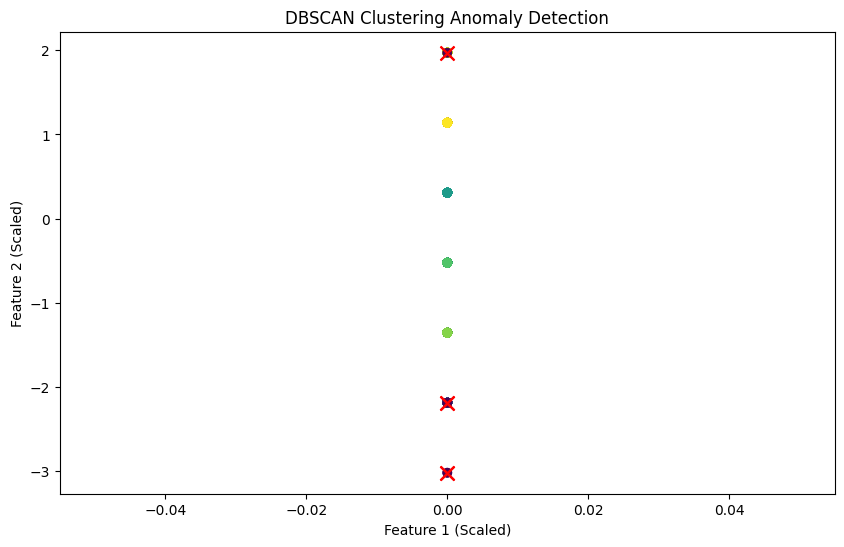

       Time  Temp  Setpt    Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  09:43:35  24.7   25.0  11.80   14.44    24.7   19.93    64.7    30.4   
1  09:43:35  24.7   25.0  11.40   14.44    24.7   19.94    64.7    30.4   
2  09:43:37  24.7   25.0  11.15   14.43    24.7   19.97    64.7    30.4   
3  09:43:38  24.6   25.0   9.87   14.44    24.6   19.98    64.7    30.5   
4  09:43:39  24.6   25.0   9.09   14.45    24.6   19.99    64.7    30.5   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -4.6  ...      3.76  35.69    3.27   11.80    5.64    25.0    20.0   
1      -4.3  ...      3.76  35.69    3.29   11.40    5.60    25.0    20.0   
2      -4.3  ...      3.75  35.70    3.32   11.10    7.04    25.0    20.0   
3      -4.3  ...      3.75  35.70    3.33    9.32    7.37    25.0    20.0   
4      -4.5  ...      3.75  35.70    3.34    8.98    8.79    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   14.09     0.0  
1    25.0   14.09     0.0  
2 

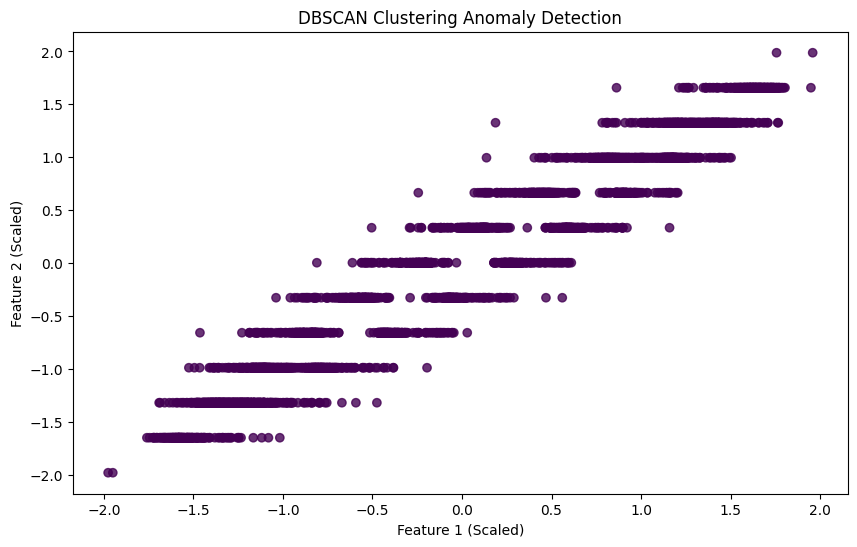

       Time  Temp  Setpt  Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  09:48:55  26.9   25.0  0.0   15.12    26.9   19.58    64.8    28.9   
1  09:48:56  26.9   25.0  0.0   15.11    26.9   19.56    64.8    28.8   
2  09:48:57  26.9   25.0  0.0   15.11    26.9   19.53    64.8    28.8   
3  09:48:58  26.9   25.0  0.0   15.11    26.9   19.52    64.9    28.9   
4  09:48:59  26.9   25.0  0.0   15.10    26.9   19.51    64.9    28.9   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -3.2  ...      3.78  27.64    2.78     0.0   64.43    25.0    20.0   
1      -3.2  ...      3.78  27.64    2.76     0.0   65.45    25.0    20.0   
2      -3.2  ...      3.78  27.64    2.74     0.0   74.17    25.0    20.0   
3      -3.2  ...      3.78  27.64    2.71     0.0   77.93    25.0    20.0   
4      -3.2  ...      3.77  27.64    2.71     0.0   83.30    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0    14.0     0.0  
1    25.0    14.0     0.0  
2    25.0    1

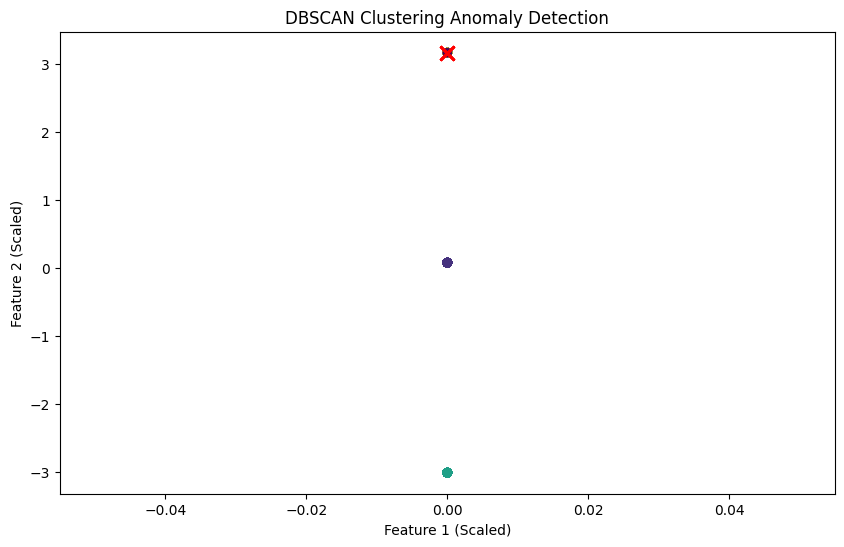

       Time  Temp  Setpt  Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  09:36:28  25.0   25.0  0.0   15.02    25.0   19.89    63.6    27.3   
1  09:36:29  25.0   25.0  0.0   15.02    25.0   19.85    63.6    27.3   
2  09:36:30  25.0   25.0  0.0   15.02    25.0   19.83    63.6    27.3   
3  09:36:31  25.1   25.0  0.0   15.01    25.1   19.85    63.6    27.3   
4  09:36:32  25.1   25.0  0.0   15.01    25.1   19.87    63.6    27.3   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -2.9  ...      3.75   33.8    3.46     0.0     0.0    25.0    20.0   
1      -3.0  ...      3.75   33.8    3.42     0.0     0.0    25.0    20.0   
2      -3.0  ...      3.75   33.8    3.40     0.0     0.0    25.0    20.0   
3      -3.0  ...      3.75   33.8    3.40     0.0     0.0    25.0    20.0   
4      -3.0  ...      3.75   33.8    3.43     0.0     0.0    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   13.96     0.0  
1    25.0   13.96     0.0  
2    25.0   13

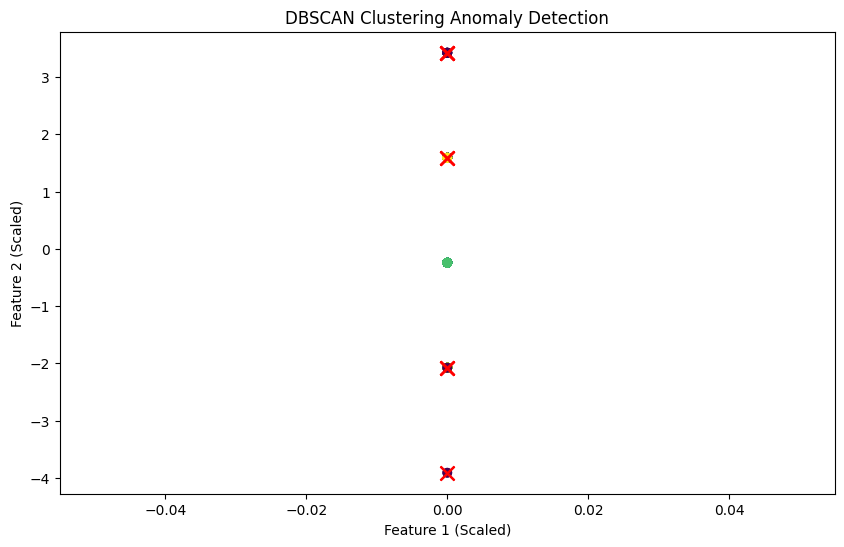

       Time  Temp  Setpt  Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  09:39:20  25.1   25.0  0.0    15.2    25.1   19.91    64.2    27.1   
1  09:39:21  25.1   25.0  0.0    15.2    25.1   19.93    64.2    27.1   
2  09:39:22  25.1   25.0  0.0    15.2    25.1   19.96    64.2    27.1   
3  09:39:23  25.1   25.0  0.0    15.2    25.1   19.97    64.2    27.1   
4  09:39:24  25.2   25.0  0.0    15.2    25.2   19.97    64.2    27.1   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -3.2  ...      3.74  33.41    3.72     0.0     0.0    25.0    20.0   
1      -3.2  ...      3.75  33.42    3.74     0.0     0.0    25.0    20.0   
2      -3.2  ...      3.75  33.42    3.77     0.0     0.0    25.0    20.0   
3      -3.2  ...      3.74  33.42    3.79     0.0     0.0    25.0    20.0   
4      -3.2  ...      3.75  33.42    3.80     0.0     0.0    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   13.56     0.0  
1    25.0   13.56     0.0  
2    25.0   13

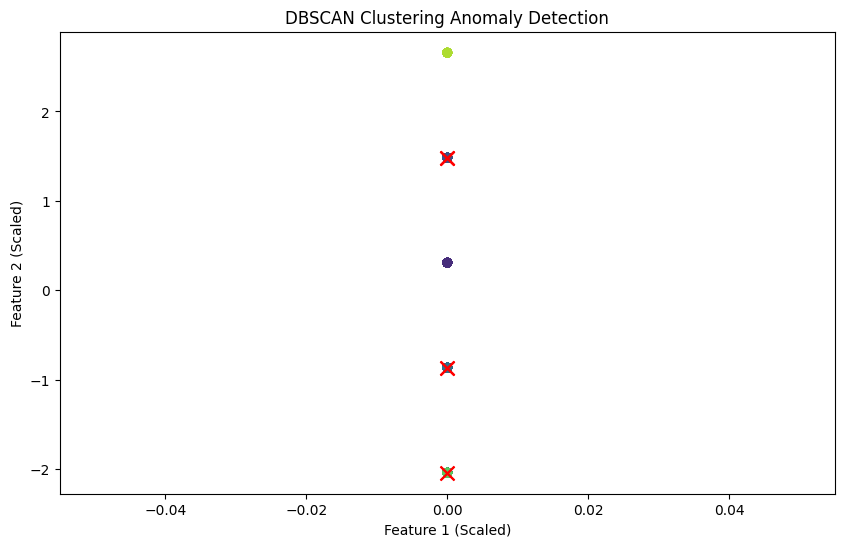

       Time  Temp  Setpt  Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  14:40:56  24.8   25.0  0.0   15.67    24.8   20.01    64.0    28.4   
1  14:40:57  24.8   25.0  0.0   15.66    24.8   20.01    64.0    28.4   
2  14:40:58  24.8   25.0  0.0   15.65    24.8   20.00    64.0    28.4   
3  14:40:59  24.8   25.0  0.0   15.64    24.8   20.00    64.0    28.4   
4  14:41:00  24.7   25.0  0.0   15.63    24.7   20.00    64.0    28.4   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -2.6  ...      3.76  35.24    3.79     0.0    1.47    25.0    20.0   
1      -2.7  ...      3.76  35.25    3.79     0.0    1.37    25.0    20.0   
2      -2.7  ...      3.76  35.25    3.78     0.0    1.13    25.0    20.0   
3      -2.6  ...      3.76  35.25    3.78     0.0    2.10    25.0    20.0   
4      -2.6  ...      3.76  35.25    3.78     0.0    2.47    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   13.61     0.0  
1    25.0   13.61     0.0  
2    25.0   13

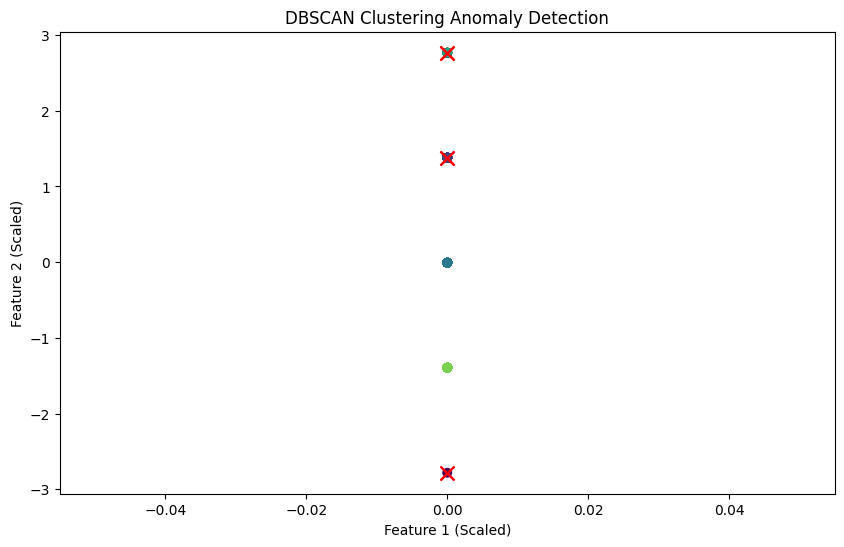

       Time  Temp  Setpt  Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  10:10:12  24.2   25.0  0.0   15.19    24.2   19.71    63.3    27.5   
1  10:10:12  24.2   25.0  0.0   15.19    24.2   19.70    63.3    27.5   
2  10:10:14  24.3   25.0  0.0   15.19    24.3   19.73    63.4    27.4   
3  10:10:15  24.3   25.0  0.0   15.20    24.3   19.76    63.4    27.4   
4  10:10:15  24.3   25.0  0.0   15.20    24.3   19.77    63.4    27.4   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -2.9  ...      3.75  36.17    3.45     0.0     0.0    25.0    20.0   
1      -2.9  ...      3.74  36.17    3.45     0.0     0.0    25.0    20.0   
2      -2.9  ...      3.76  36.17    3.47     0.0     0.0    25.0    20.0   
3      -2.8  ...      3.76  36.18    3.50     0.0     0.0    25.0    20.0   
4      -2.8  ...      3.75  36.18    3.52     0.0     0.0    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   14.59     0.0  
1    25.0   14.59     0.0  
2    25.0   14

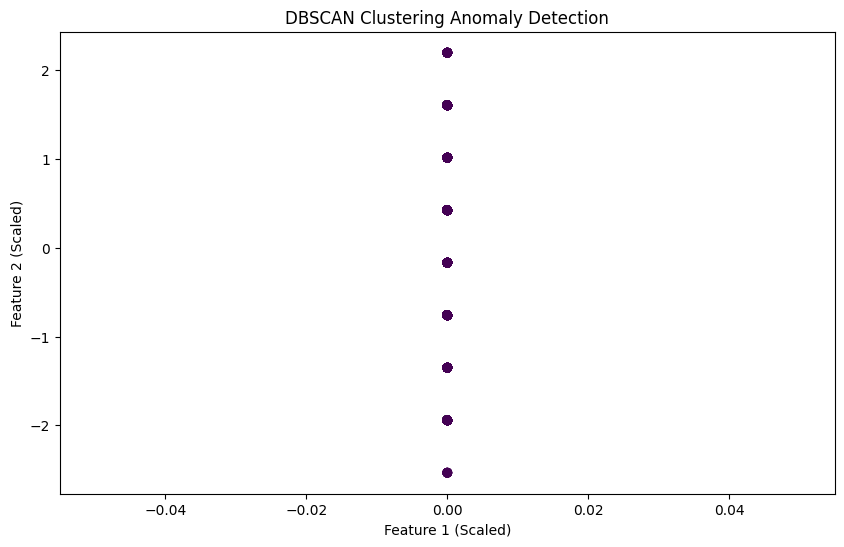

       Time  Temp  Setpt  Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  09:58:31  25.0   25.0  0.0   14.50    25.0   19.84    62.9    27.9   
1  09:58:31  25.0   25.0  0.0   14.55    25.0   19.75    62.9    27.9   
2  09:58:33  25.0   25.0  0.0   14.68    25.0   19.23    62.9    27.9   
3  09:58:33  25.0   25.0  0.0   14.75    25.0   19.00    62.9    27.9   
4  09:58:35  25.0   25.0  0.0   14.85    25.0   18.83    62.9    27.9   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0       0.2  ...      3.77  33.45   11.05     0.0    0.65    25.0    12.0   
1       0.2  ...      3.77  33.45   10.95     0.0    0.90    25.0    12.0   
2       0.2  ...      3.76  33.46   10.50     0.0    0.10    25.0    12.0   
3       0.5  ...      3.77  33.46   10.21     0.0    0.36    25.0    12.0   
4       0.5  ...      3.76  33.46   10.04     0.0    0.56    25.0    12.0   

   DrvSet  CLevel  InwTmp  
0    25.0   14.42     0.0  
1    25.0   14.42     0.0  
2    25.0   14

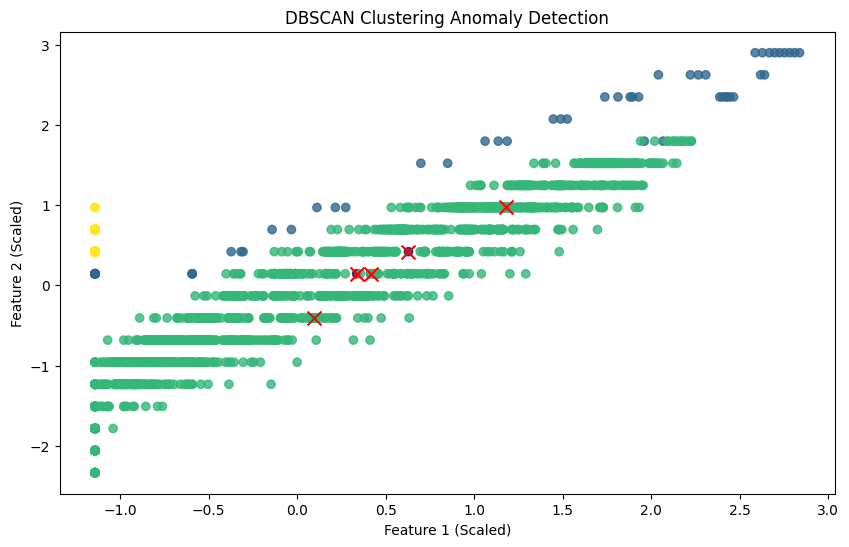

       Time  Temp  Setpt  Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  10:08:40  24.5   25.0  0.0   14.98    24.5    19.8    63.2    27.1   
1  10:08:41  24.5   25.0  0.0   14.98    24.5    19.8    63.2    27.1   
2  10:08:42  24.4   25.0  0.0   14.98    24.4    19.8    63.2    27.1   
3  10:08:43  24.4   25.0  0.0   14.99    24.4    19.8    63.2    27.1   
4  10:08:44  24.4   25.0  0.0   14.99    24.4    19.8    63.2    27.1   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -2.9  ...      3.76  35.76    3.11     0.0     0.0    25.0    20.0   
1      -2.9  ...      3.75  35.76    3.11     0.0     0.0    25.0    20.0   
2      -2.9  ...      3.76  35.75    3.11     0.0     0.0    25.0    20.0   
3      -2.9  ...      3.75  35.75    3.11     0.0     0.0    25.0    20.0   
4      -2.9  ...      3.75  35.75    3.11     0.0     0.0    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   19.17     0.0  
1    25.0   19.22     0.0  
2    25.0   19

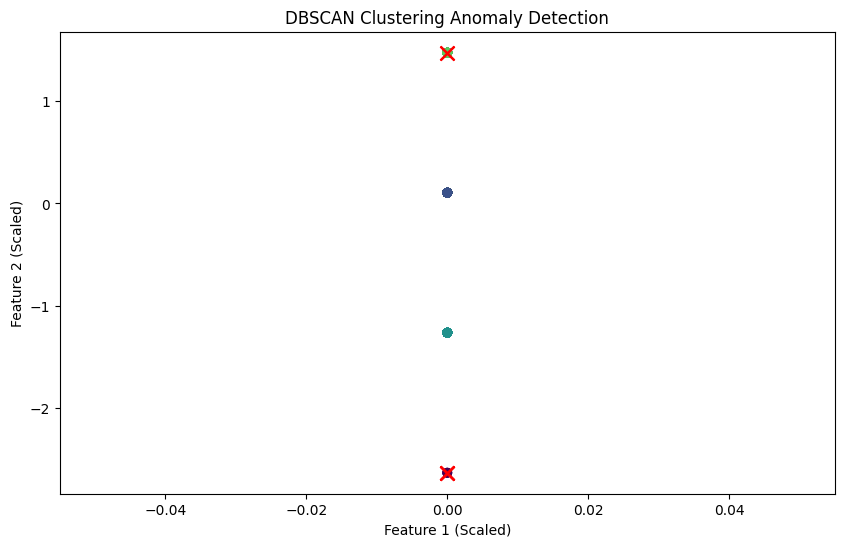

       Time  Temp  Setpt  Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  10:12:33  24.7   25.0  0.0   15.11    24.7   19.97    63.5    27.4   
1  10:12:34  24.7   25.0  0.0   15.11    24.7   19.95    63.5    27.4   
2  10:12:35  24.7   25.0  0.0   15.11    24.7   19.93    63.5    27.4   
3  10:12:36  24.7   25.0  0.0   15.11    24.7   19.92    63.5    27.4   
4  10:12:37  24.7   25.0  0.0   15.10    24.7   19.95    63.5    27.4   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -2.9  ...      3.76   35.4    3.58     0.0     0.0    25.0    20.0   
1      -2.9  ...      3.75   35.4    3.56     0.0     0.0    25.0    20.0   
2      -2.9  ...      3.75   35.4    3.54     0.0     0.0    25.0    20.0   
3      -2.9  ...      3.76   35.4    3.54     0.0     0.0    25.0    20.0   
4      -2.9  ...      3.76   35.4    3.57     0.0     0.0    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   18.52     0.0  
1    25.0   18.52     0.0  
2    25.0   18

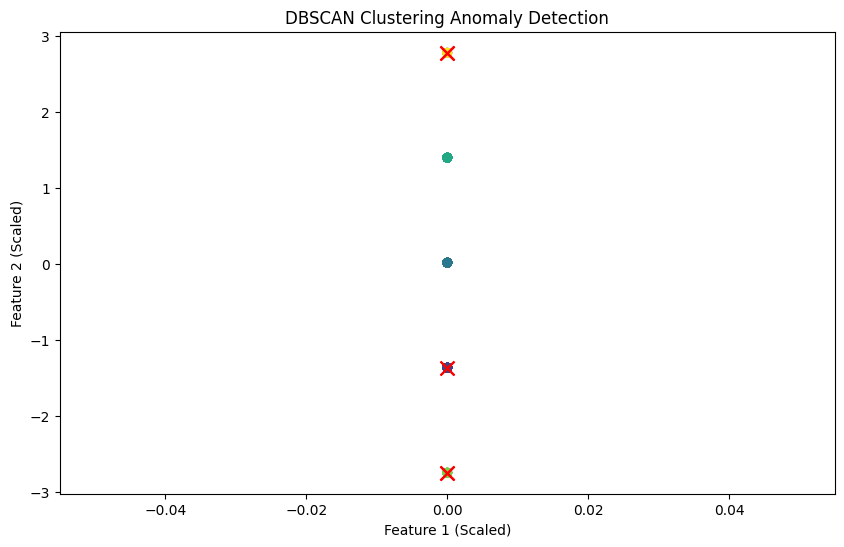

       Time  Temp  Setpt  Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  15:07:31  25.0   25.0  0.0   15.21    25.0   20.07    63.6    27.2   
1  15:07:32  25.0   25.0  0.0   15.23    25.0   20.05    63.6    27.2   
2  15:07:33  25.0   25.0  0.0   15.24    25.0   20.03    63.6    27.1   
3  15:07:34  25.0   25.0  0.0   15.25    25.0   20.02    63.5    27.1   
4  15:07:35  25.0   25.0  0.0   15.26    25.0   20.01    63.5    27.2   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -2.9  ...      3.76  36.69    3.67     0.0     0.0    25.0    20.0   
1      -2.9  ...      3.77  36.69    3.64     0.0     0.0    25.0    20.0   
2      -2.9  ...      3.77  36.69    3.62     0.0     0.0    25.0    20.0   
3      -2.9  ...      3.77  36.69    3.61     0.0     0.0    25.0    20.0   
4      -2.9  ...      3.77  36.68    3.61     0.0     0.0    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   13.91     0.0  
1    25.0   13.91     0.0  
2    25.0   13

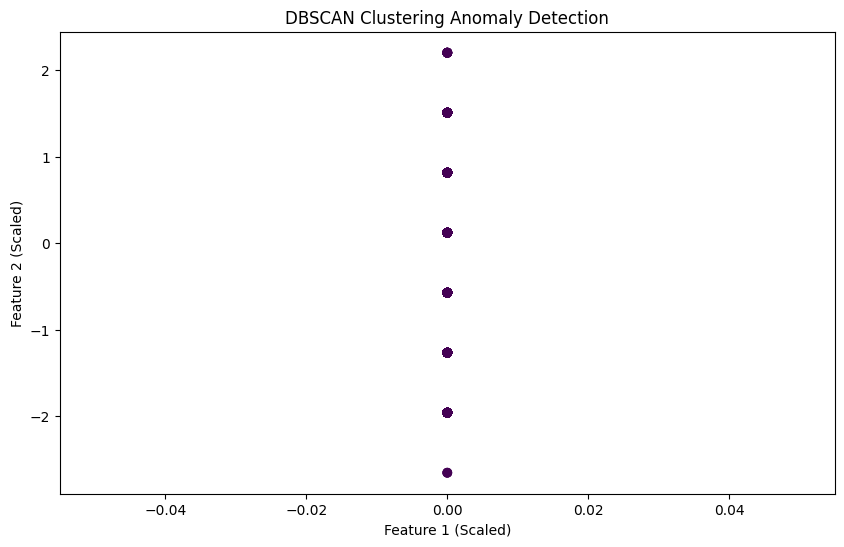

       Time  Temp  Setpt  Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  09:57:43  24.9   25.0  0.0   15.55    24.9   20.12    64.0    28.7   
1  09:57:43  24.9   25.0  0.0   15.54    24.9   20.14    64.0    28.7   
2  09:57:44  24.9   25.0  0.0   15.54    24.9   20.16    64.0    28.7   
3  09:57:45  24.9   25.0  0.0   15.53    24.9   20.18    64.0    28.7   
4  09:57:46  24.9   25.0  0.0   15.52    24.9   20.19    64.0    28.7   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -2.9  ...      3.78  35.66    3.78     0.0    9.30    25.0    20.0   
1      -2.9  ...      3.78  35.65    3.79     0.0    9.31    25.0    20.0   
2      -2.9  ...      3.78  35.66    3.82     0.0    8.09    25.0    20.0   
3      -2.9  ...      3.77  35.66    3.84     0.0    7.36    25.0    20.0   
4      -2.9  ...      3.77  35.66    3.85     0.0    7.23    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   14.21     0.0  
1    25.0   14.21     0.0  
2    25.0   14

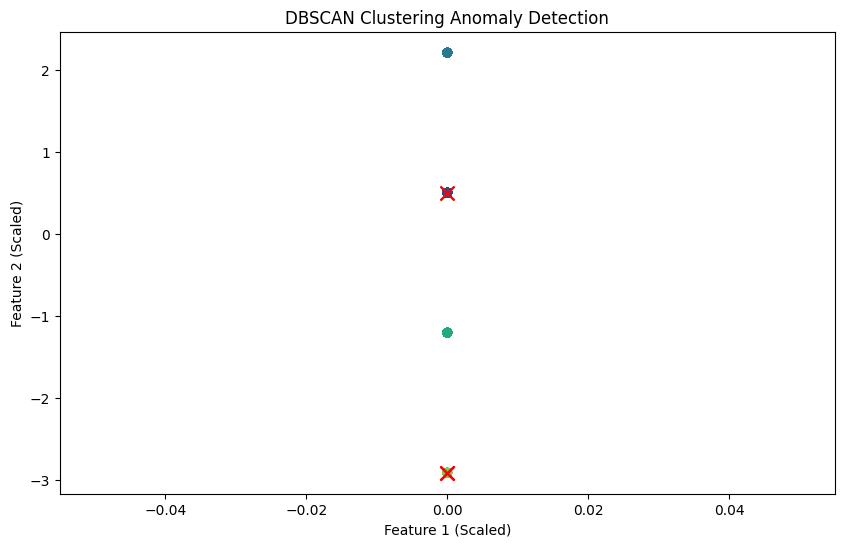

       Time  Temp  Setpt  Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  10:24:51  24.0   25.0  0.0   13.97    24.0   22.82    61.0    27.4   
1  10:24:51  24.0   25.0  0.0   13.96    24.0   22.84    61.0    27.4   
2  10:24:52  24.0   25.0  0.0   13.95    24.0   22.86    61.0    27.4   
3  10:24:53  24.1   25.0  0.0   13.96    24.1   22.88    61.1    27.3   
4  10:24:54  24.1   25.0  0.0   13.97    24.1   22.89    61.1    27.3   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -4.5  ...      3.78   36.6    3.80     0.0    6.21    25.0    20.0   
1      -4.4  ...      3.78   36.6    3.82     0.0    6.21    25.0    20.0   
2      -4.4  ...      3.80   36.6    3.84     0.0    6.21    25.0    20.0   
3      -4.4  ...      3.79   36.6    3.87     0.0    6.21    25.0    20.0   
4      -4.3  ...      3.79   36.6    3.88     0.0    6.21    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   14.35     0.0  
1    25.0   14.35     0.0  
2    25.0   14

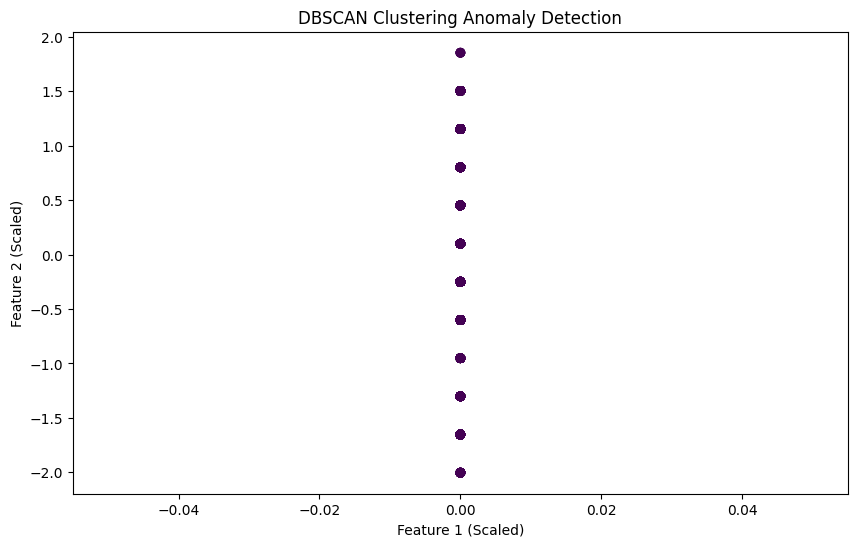

       Time  Temp  Setpt  Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  13:29:29  24.3   25.0  0.0   14.98    24.3   20.02    64.0    29.1   
1  13:29:31  24.3   25.0  0.0   14.98    24.3   20.07    64.0    29.1   
2  13:29:33  24.3   25.0  0.0   14.99    24.3   20.11    64.0    29.1   
3  13:29:34  24.3   25.0  0.0   15.01    24.3   20.17    64.0    29.1   
4  13:29:34  24.3   25.0  0.0   15.02    24.3   20.17    64.0    29.1   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -3.7  ...      3.78  36.43    3.55     0.0    9.16    25.0    20.0   
1      -3.7  ...      3.78  36.43    3.59     0.0    9.13    25.0    20.0   
2      -3.6  ...      3.78  36.43    3.66     0.0   10.34    25.0    20.0   
3      -3.6  ...      3.78  36.43    3.69     0.0   10.99    25.0    20.0   
4      -3.6  ...      3.78  36.43    3.69     0.0   11.05    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   14.00     0.0  
1    25.0   14.00     0.0  
2    25.0   14

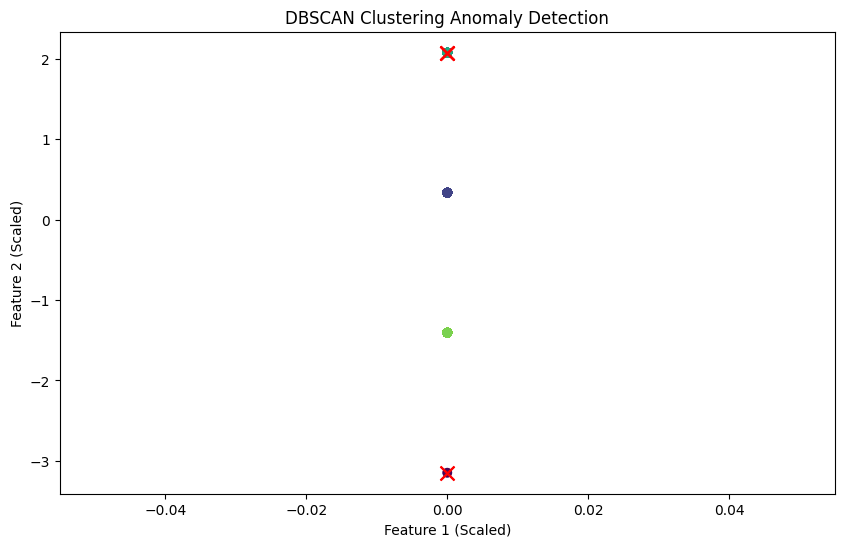

       Time  Temp  Setpt  Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  13:46:16  24.5   25.0  0.0   14.76    24.5    19.7    64.0    27.6   
1  13:46:16  24.5   25.0  0.0   14.75    24.5    19.7    64.0    27.6   
2  13:46:17  24.5   25.0  0.0   14.76    24.5    19.7    64.0    27.6   
3  13:46:18  24.5   25.0  0.0   14.77    24.5    19.7    64.0    27.6   
4  13:46:19  24.4   25.0  0.0   14.77    24.4    19.7    64.0    27.6   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -3.5  ...      3.78  36.47    3.22     0.0     0.0    25.0    20.0   
1      -3.5  ...      3.78  36.47    3.22     0.0     0.0    25.0    20.0   
2      -3.5  ...      3.78  36.47    3.22     0.0     0.0    25.0    20.0   
3      -3.5  ...      3.78  36.47    3.22     0.0     0.0    25.0    20.0   
4      -3.5  ...      3.79  36.47    3.22     0.0     0.0    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   15.19     0.0  
1    25.0   15.19     0.0  
2    25.0   15

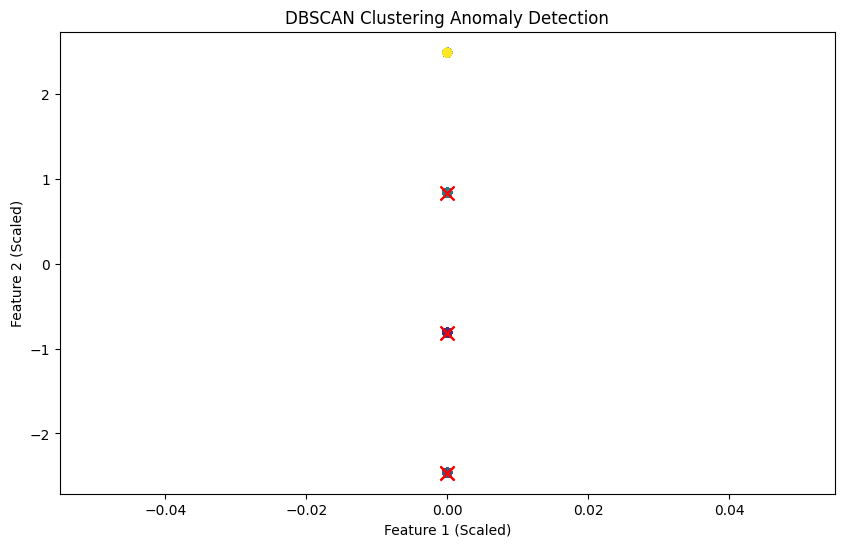

       Time  Temp  Setpt  Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  10:12:40  24.5   25.0  0.0   14.98    24.5    20.1    64.3    28.5   
1  10:12:40  24.5   25.0  0.0   14.98    24.5    20.1    64.3    28.5   
2  10:12:41  24.6   25.0  0.0   14.99    24.6    20.1    64.3    28.5   
3  10:12:42  24.6   25.0  0.0   14.99    24.6    20.1    64.3    28.5   
4  10:12:43  24.4   25.0  0.0   14.99    24.4    20.1    64.2    28.5   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -3.7  ...      3.74  36.04    3.68     0.0    1.39    25.0    20.0   
1      -3.7  ...      3.74  36.04    3.68     0.0    1.32    25.0    20.0   
2      -3.7  ...      3.75  36.04    3.68     0.0    1.11    25.0    20.0   
3      -3.7  ...      3.74  36.04    3.68     0.0    0.97    25.0    20.0   
4      -3.7  ...      3.75  36.05    3.68     0.0    0.83    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   15.61     0.0  
1    25.0   15.61     0.0  
2    25.0   15

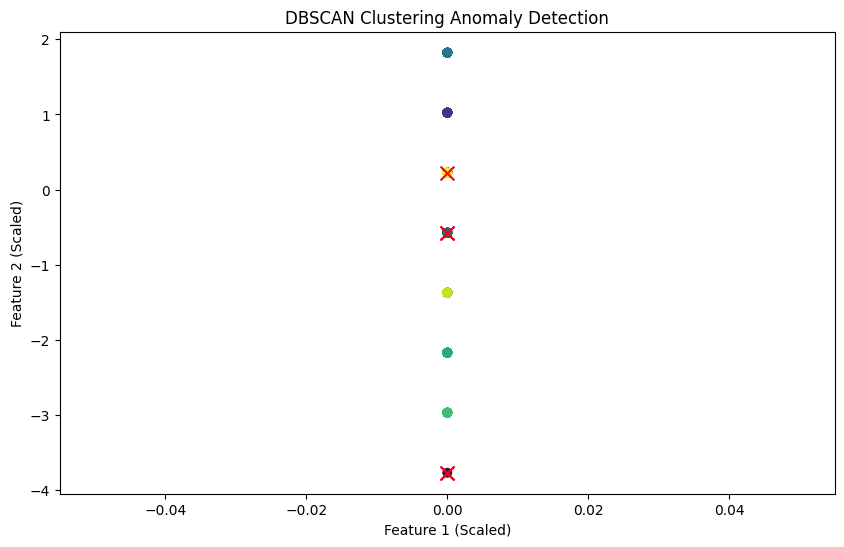

       Time  Temp  Setpt  Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  10:04:15  24.6   25.0  0.0    14.8    24.6    20.0    64.2    28.0   
1  10:04:16  24.6   25.0  0.0    14.8    24.6    20.0    64.1    28.0   
2  10:04:17  24.6   25.0  0.0    14.8    24.6    20.0    64.1    28.0   
3  10:04:18  24.6   25.0  0.0    14.8    24.6    20.0    64.1    28.0   
4  10:04:19  24.6   25.0  0.0    14.8    24.6    20.0    64.1    28.0   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -3.7  ...      3.76  35.19    3.33     0.0     0.0    25.0    20.0   
1      -3.7  ...      3.77  35.19    3.33     0.0     0.0    25.0    20.0   
2      -3.7  ...      3.77  35.19    3.33     0.0     0.0    25.0    20.0   
3      -3.7  ...      3.77  35.19    3.33     0.0     0.0    25.0    20.0   
4      -3.7  ...      3.77  35.19    3.33     0.0     0.0    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   15.49     0.0  
1    25.0   15.49     0.0  
2    25.0   15

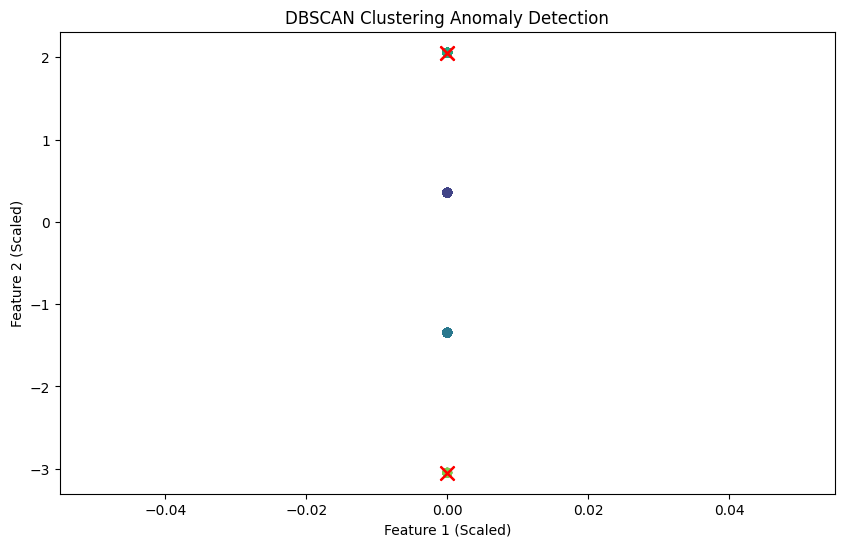

       Time  Temp  Setpt  Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  09:41:43  24.7   25.0  0.0    14.6    24.7    20.0    64.0    27.3   
1  09:41:44  24.8   25.0  0.0    14.6    24.8    20.0    64.0    27.3   
2  09:41:44  24.8   25.0  0.0    14.6    24.8    20.0    64.0    27.3   
3  09:41:46  24.8   25.0  0.0    14.6    24.8    20.0    64.1    27.3   
4  09:41:47  24.7   25.0  0.0    14.6    24.7    20.0    64.1    27.3   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -3.8  ...      3.76  32.56    3.36     0.0     0.0    25.0    20.0   
1      -3.8  ...      3.77  32.56    3.36     0.0     0.0    25.0    20.0   
2      -3.8  ...      3.76  32.56    3.36     0.0     0.0    25.0    20.0   
3      -3.8  ...      3.76  32.56    3.36     0.0     0.0    25.0    20.0   
4      -3.8  ...      3.76  32.56    3.36     0.0     0.0    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   15.17     0.0  
1    25.0   15.17     0.0  
2    25.0   15

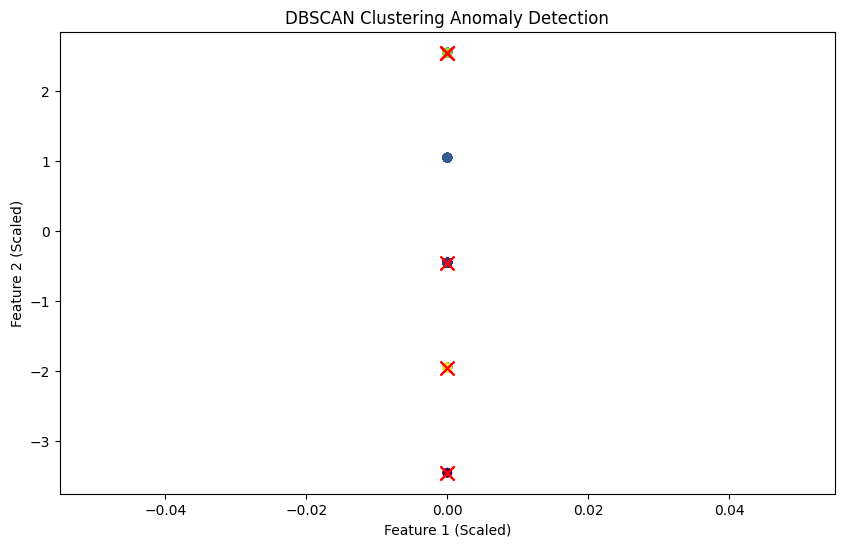

       Time  Temp  Setpt  Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  10:38:50  24.7   25.0  0.0   14.63    24.7    20.1    64.2    28.8   
1  10:38:51  24.8   25.0  0.0   14.63    24.8    20.1    64.3    28.8   
2  10:38:52  24.8   25.0  0.0   14.62    24.8    20.1    64.3    28.8   
3  10:38:53  24.7   25.0  0.0   14.63    24.7    20.1    64.3    28.8   
4  10:38:54  24.7   25.0  0.0   14.64    24.7    20.1    64.3    28.8   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -4.0  ...      3.70  33.56     3.6     0.0   33.11    25.0    20.0   
1      -4.0  ...      3.70  33.56     3.6     0.0   45.31    25.0    20.0   
2      -4.0  ...      3.71  33.56     3.6     0.0   47.35    25.0    20.0   
3      -4.0  ...      3.72  33.56     3.6     0.0   59.55    25.0    20.0   
4      -4.0  ...      3.71  33.56     3.6     0.0   68.00    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0    15.4     0.0  
1    25.0    15.4     0.0  
2    25.0    1

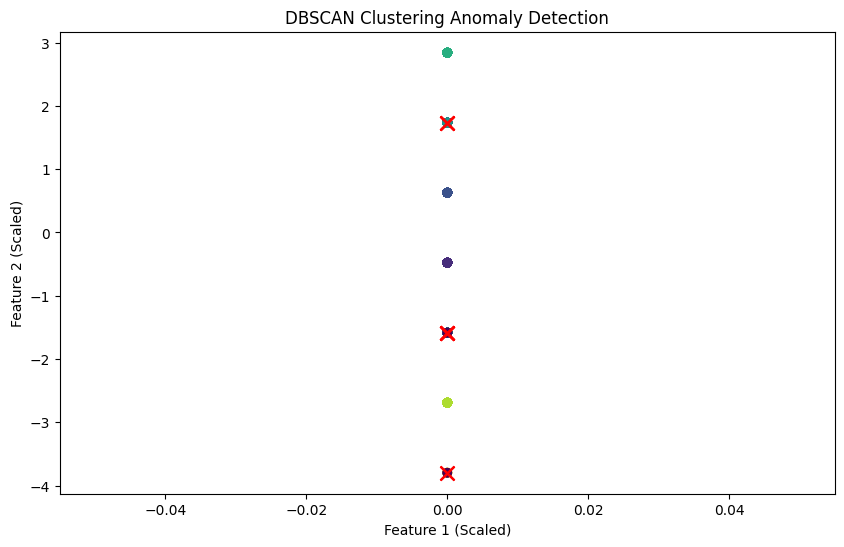

       Time  Temp  Setpt  Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  15:18:38  24.9   25.0  0.0   14.54    24.9    19.7    64.3    28.8   
1  15:18:38  24.9   25.0  0.0   14.54    24.9    19.7    64.3    28.8   
2  15:18:39  24.9   25.0  0.0   14.53    24.9    19.7    64.3    28.8   
3  15:18:40  24.9   25.0  0.0   14.53    24.9    19.7    64.3    28.7   
4  15:18:41  24.9   25.0  0.0   14.52    24.9    19.7    64.3    28.7   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -3.9  ...      3.73  34.18    3.14     0.0    8.86    25.0    20.0   
1      -3.9  ...      3.74  34.18    3.13     0.0    8.85    25.0    20.0   
2      -3.9  ...      3.74  34.18    3.13     0.0    8.83    25.0    20.0   
3      -3.9  ...      3.74  34.18    3.13     0.0    8.81    25.0    20.0   
4      -4.1  ...      3.74  34.18    3.13     0.0    9.19    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0    7.05     0.0  
1    25.0    7.05     0.0  
2    25.0    7

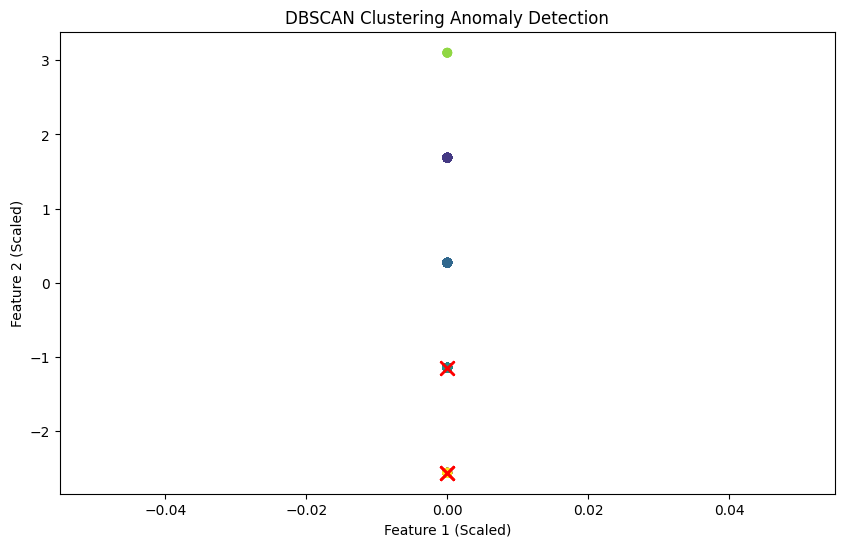

       Time  Temp  Setpt   Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  10:14:11  24.7   25.0  4.86   14.71    24.7   20.01    64.6    28.7   
1  10:14:12  24.7   25.0  4.67   14.71    24.7   20.01    64.6    28.7   
2  10:14:13  24.9   25.0  4.59   14.71    24.9   20.01    64.6    28.7   
3  10:14:14  24.9   25.0  7.97   14.71    24.9   20.04    64.5    28.8   
4  10:14:15  24.9   25.0  8.46   14.71    24.9   20.07    64.5    28.8   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -4.0  ...      3.74  36.63    3.59    4.73    5.84    25.0    20.0   
1      -3.9  ...      3.74  36.64    3.58    4.62    5.78    25.0    20.0   
2      -3.9  ...      3.74  36.65    3.58    6.98    7.38    25.0    20.0   
3      -4.0  ...      3.74  36.66    3.61    8.33    7.65    25.0    20.0   
4      -4.0  ...      3.74  36.68    3.64    8.50    7.65    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   15.19     0.0  
1    25.0   15.19     0.0  
2    25.

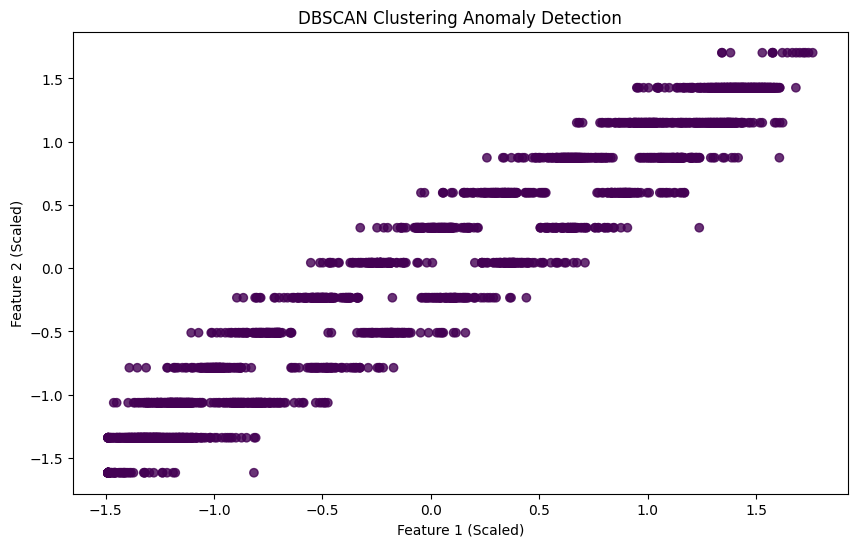

       Time  Temp  Setpt    Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  10:53:16  25.2   25.0  12.67   14.56    25.2    20.1    64.1    27.3   
1  10:53:17  25.2   25.0  12.98   14.56    25.2    20.1    64.1    27.3   
2  10:53:18  25.2   25.0  13.17   14.55    25.2    20.1    64.2    27.3   
3  10:53:19  25.2   25.0  13.23   14.54    25.2    20.1    64.2    27.4   
4  10:53:20  25.2   25.0  13.28   14.54    25.2    20.1    64.2    27.4   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -4.0  ...      3.76  39.17    3.61   12.67     0.0    25.0    20.0   
1      -4.0  ...      3.75  39.17    3.61   13.11     0.0    25.0    20.0   
2      -4.0  ...      3.74  39.17    3.62   13.21     0.0    25.0    20.0   
3      -4.0  ...      3.75  39.17    3.62   13.25     0.0    25.0    20.0   
4      -4.0  ...      3.74  39.17    3.62   13.29     0.0    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   14.96     0.0  
1    25.0   14.96     0.0  
2 

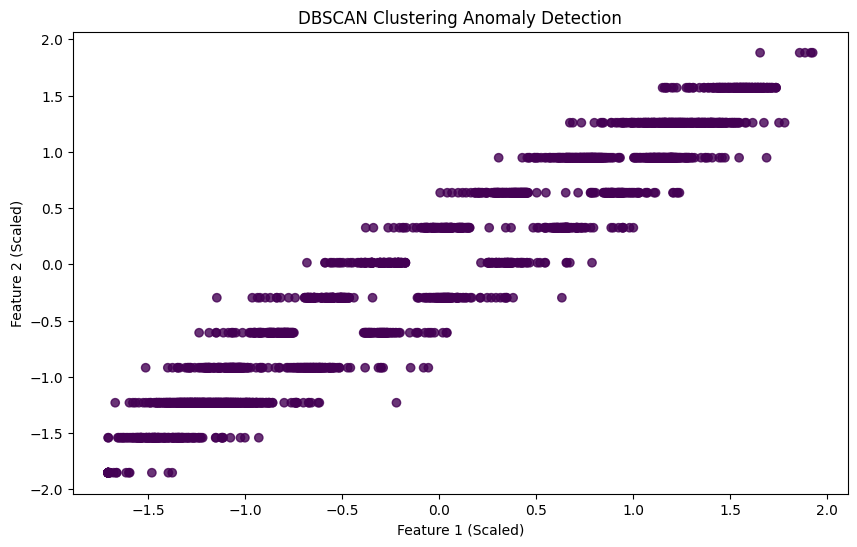

       Time  Temp  Setpt    Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  13:44:19  25.5   25.0  22.45   14.50    25.5   20.16    64.1    27.7   
1  13:44:19  25.6   25.0  23.37   14.50    25.6   20.16    64.1    27.7   
2  13:44:20  25.6   25.0  24.47   14.50    25.6   20.13    64.1    27.7   
3  13:44:22  25.6   25.0  24.72   14.51    25.6   20.13    64.1    27.7   
4  13:44:23  25.6   25.0  24.86   14.53    25.6   20.16    64.2    27.7   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -3.9  ...      3.75  36.61    3.98   22.45     0.0    25.0    20.0   
1      -3.9  ...      3.75  36.61    3.99   23.37     0.0    25.0    20.0   
2      -3.9  ...      3.75  36.60    3.96   24.63     0.0    25.0    20.0   
3      -3.9  ...      3.74  36.60    3.96   24.80     0.0    25.0    20.0   
4      -4.0  ...      3.75  36.60    3.99   24.92     0.0    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   14.96     0.0  
1    25.0   14.96     0.0  
2 

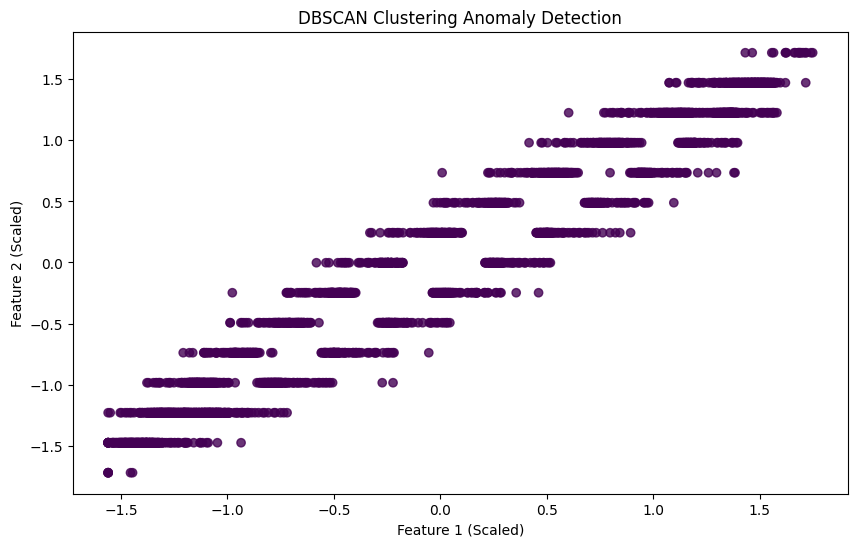

       Time  Temp  Setpt    Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  14:40:53  25.5   25.0  22.73   14.96    25.5   20.14    64.2    28.8   
1  14:40:54  25.5   25.0  22.78   14.97    25.5   20.14    64.1    28.8   
2  14:40:55  25.5   25.0  22.88   14.97    25.5   20.17    64.1    28.8   
3  14:40:56  25.5   25.0  22.98   14.98    25.5   20.17    64.1    28.8   
4  14:40:57  25.5   25.0  23.08   14.98    25.5   20.14    64.2    28.8   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -3.8  ...      3.74  39.21    3.94   22.78     0.0    25.0    20.0   
1      -3.8  ...      3.74  39.22    3.94   22.83     0.0    25.0    20.0   
2      -3.7  ...      3.75  39.22    3.96   22.93     0.0    25.0    20.0   
3      -3.7  ...      3.75  39.23    3.97   23.03     0.0    25.0    20.0   
4      -3.7  ...      3.74  39.23    3.94   23.13     0.0    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   14.59     0.0  
1    25.0   14.62     0.0  
2 

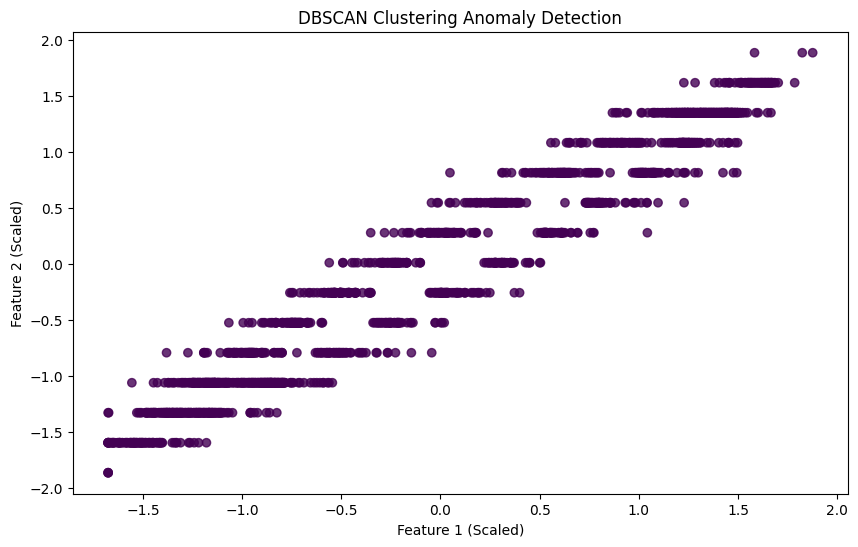

       Time  Temp  Setpt   Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  15:30:35  24.5   25.0  2.85   14.56    24.5    20.0    64.3    27.5   
1  15:30:35  24.5   25.0  2.74   14.55    24.5    20.0    64.3    27.5   
2  15:30:36  24.5   25.0  2.65   14.56    24.5    20.0    64.3    27.5   
3  15:30:37  24.5   25.0  2.54   14.56    24.5    20.0    64.3    27.6   
4  15:30:38  24.5   25.0  2.44   14.57    24.5    20.0    64.3    27.6   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -3.9  ...      3.76  38.88    3.71    2.80     0.0    25.0    20.0   
1      -3.9  ...      3.76  38.88    3.71    2.74     0.0    25.0    20.0   
2      -3.9  ...      3.76  38.88    3.71    2.65     0.0    25.0    20.0   
3      -3.9  ...      3.75  38.89    3.71    2.54     0.0    25.0    20.0   
4      -3.9  ...      3.75  38.88    3.71    2.44     0.0    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   14.56     0.0  
1    25.0   14.56     0.0  
2    25.

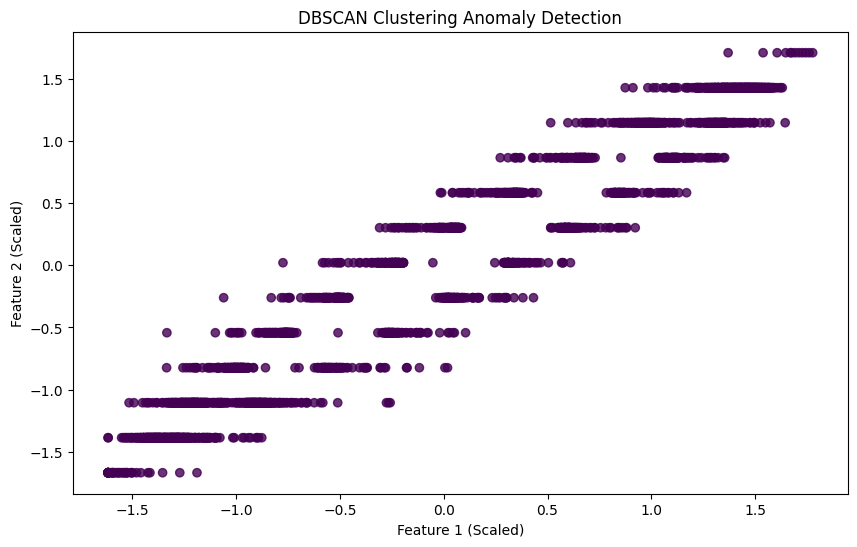

       Time  Temp  Setpt  Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  10:00:16  25.4   25.0  0.0   14.46    25.4   19.84    64.2    27.7   
1  10:00:17  25.4   25.0  0.0   14.45    25.4   19.85    64.1    27.7   
2  10:00:18  25.4   25.0  0.0   14.44    25.4   19.87    64.1    27.7   
3  10:00:19  25.4   25.0  0.0   14.44    25.4   19.88    64.1    27.7   
4  10:00:20  25.4   25.0  0.0   14.43    25.4   19.89    64.1    27.7   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -4.1  ...      3.75  32.05    3.36     0.0     0.0    25.0    20.0   
1      -4.1  ...      3.76  32.05    3.36     0.0     0.0    25.0    20.0   
2      -4.0  ...      3.76  32.05    3.38     0.0     0.0    25.0    20.0   
3      -4.0  ...      3.75  32.05    3.40     0.0     0.0    25.0    20.0   
4      -4.0  ...      3.76  32.05    3.41     0.0     0.0    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   14.56     0.0  
1    25.0   14.56     0.0  
2    25.0   14

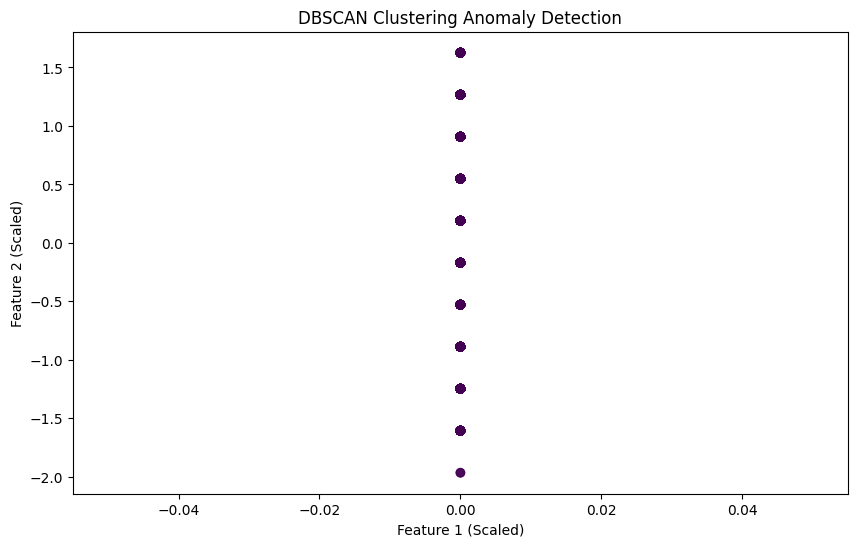

       Time  Temp  Setpt  Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  14:38:01  22.4   25.0  0.0   13.26    22.4   14.73    57.4    26.7   
1  14:38:03  22.4   25.0  0.0   13.22    22.4   14.67    57.4    26.6   
2  14:38:04  22.4   25.0  0.0   13.20    22.4   14.64    57.4    26.6   
3  14:38:04  22.4   25.0  0.0   13.19    22.4   14.63    57.4    26.6   
4  14:38:06  22.4   25.0  0.0   13.15    22.4   14.61    57.4    26.6   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0       2.4  ...      3.78  40.41    4.98     0.0     0.0    25.0    12.0   
1       2.3  ...      3.78  40.41    4.93     0.0     0.0    25.0    12.0   
2       2.3  ...      3.78  40.41    4.90     0.0     0.0    25.0    12.0   
3       2.3  ...      3.78  40.41    4.89     0.0     0.0    25.0    12.0   
4       2.3  ...      3.79  40.41    4.86     0.0     0.0    25.0    12.0   

   DrvSet  CLevel  InwTmp  
0    25.0   14.84     0.0  
1    25.0   14.84     0.0  
2    25.0   14

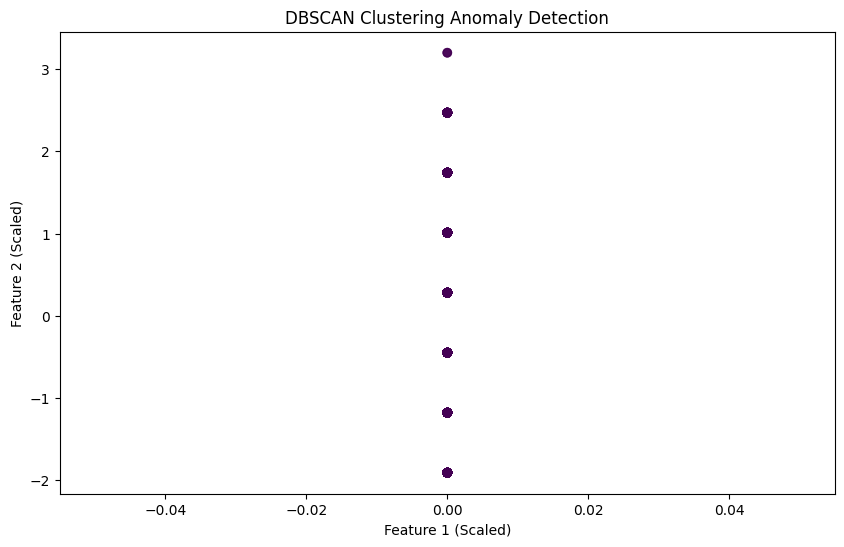

       Time  Temp  Setpt  Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  10:42:17  24.5   25.0  0.0   15.21    24.5    20.0    64.1    28.7   
1  10:42:18  24.5   25.0  0.0   15.21    24.5    20.0    64.1    28.7   
2  10:42:19  24.5   25.0  0.0   15.20    24.5    20.0    64.1    28.7   
3  10:42:20  24.5   25.0  0.0   15.20    24.5    20.0    64.1    28.7   
4  10:42:21  24.5   25.0  0.0   15.20    24.5    20.0    64.1    28.7   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -3.1  ...      3.77  37.42    3.21     0.0   12.05    25.0    20.0   
1      -3.1  ...      3.77  37.42    3.21     0.0   12.06    25.0    20.0   
2      -3.1  ...      3.76  37.42    3.21     0.0   12.08    25.0    20.0   
3      -3.1  ...      3.76  37.42    3.21     0.0   12.28    25.0    20.0   
4      -3.1  ...      3.76  37.42    3.21     0.0   13.89    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   14.61     0.0  
1    25.0   14.61     0.0  
2    25.0   14

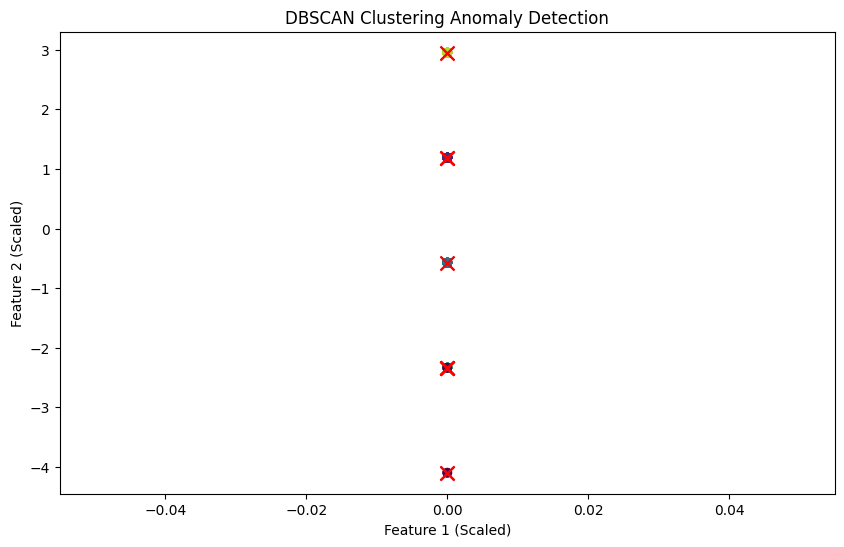

       Time  Temp  Setpt    Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  15:13:14  25.1   25.0  16.09   14.12    25.1    19.7    64.8    29.2   
1  15:13:15  25.1   25.0  16.10   14.12    25.1    19.7    64.8    29.2   
2  15:13:16  25.2   25.0  17.40   14.11    25.2    19.7    64.8    29.2   
3  15:13:17  25.2   25.0  18.07   14.11    25.2    19.7    64.8    29.2   
4  15:13:18  25.2   25.0  18.20   14.11    25.2    19.7    64.8    29.2   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -4.5  ...      3.82  37.31    3.08   16.10     0.0    25.0    20.0   
1      -4.5  ...      3.82  37.31    3.08   16.10     0.0    25.0    20.0   
2      -4.5  ...      3.82  37.31    3.08   17.88     0.0    25.0    20.0   
3      -3.6  ...      3.82  37.32    3.08   18.15     0.0    25.0    20.0   
4      -3.6  ...      3.82  37.32    3.08   18.22     0.0    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0    14.7     0.0  
1    25.0    14.7     0.0  
2 

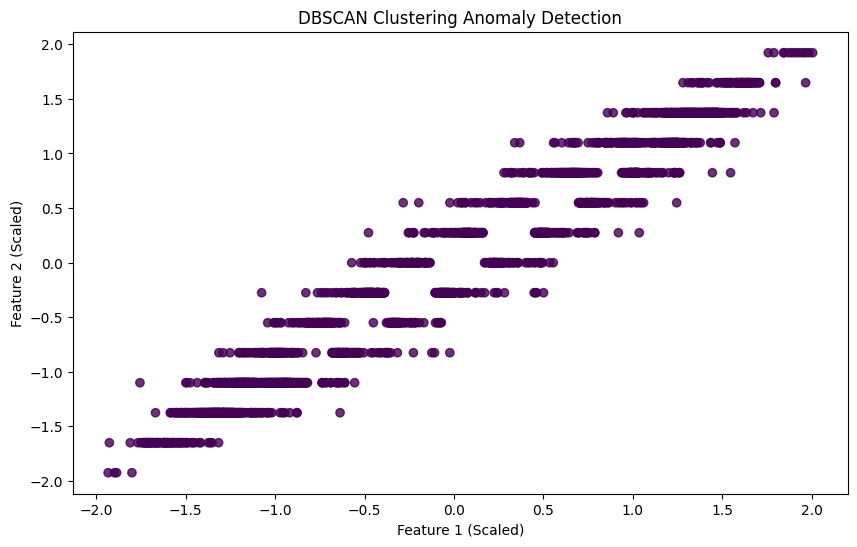

       Time  Temp  Setpt    Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  11:25:22  25.4   25.0  19.09   14.77    25.4   19.71    64.5    28.4   
1  11:25:22  25.4   25.0  19.13   14.76    25.4   19.71    64.5    28.4   
2  11:25:23  25.4   25.0  19.17   14.75    25.4   19.73    64.6    28.4   
3  11:25:24  25.4   25.0  19.25   14.74    25.4   19.76    64.6    28.4   
4  11:25:25  25.5   25.0  20.82   14.73    25.5   19.75    64.6    28.3   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -3.5  ...      3.80  40.34    2.91   19.09     0.0    25.0    20.0   
1      -3.5  ...      3.81  40.34    2.91   19.17     0.0    25.0    20.0   
2      -3.5  ...      3.80  40.35    2.92   19.21     0.0    25.0    20.0   
3      -3.6  ...      3.81  40.35    2.96   19.29     0.0    25.0    20.0   
4      -3.6  ...      3.80  40.35    2.95   20.82     0.0    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   14.51     0.0  
1    25.0   14.51     0.0  
2 

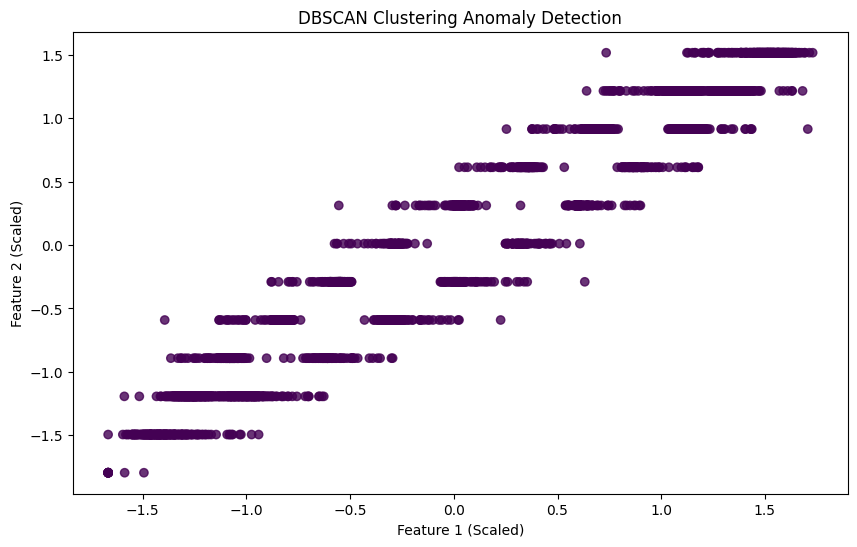

       Time  Temp  Setpt    Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  13:57:16  25.4   25.0  17.64    8.50    25.4   12.19    58.6    28.3   
1  13:57:17  25.4   25.0  17.68    8.50    25.4   12.19    58.6    28.3   
2  13:57:18  25.4   25.0  17.76    8.51    25.4   12.21    58.6    28.3   
3  13:57:19  25.4   25.0  17.84    8.53    25.4   12.24    58.6    28.4   
4  13:57:20  25.4   25.0  17.92    8.53    25.4   12.27    58.6    28.4   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -3.1  ...      3.76  34.58    4.05   17.68    0.66    25.0    12.0   
1      -3.1  ...      3.77  34.59    4.05   17.72    0.53    25.0    12.0   
2      -3.1  ...      3.77  34.59    4.07   17.80    0.27    25.0    12.0   
3      -3.1  ...      3.77  34.59    4.11   17.88    0.76    25.0    12.0   
4      -3.1  ...      3.77  34.60    4.13   17.96    1.60    25.0    12.0   

   DrvSet  CLevel  InwTmp  
0    25.0   13.77     0.0  
1    25.0   13.79     0.0  
2 

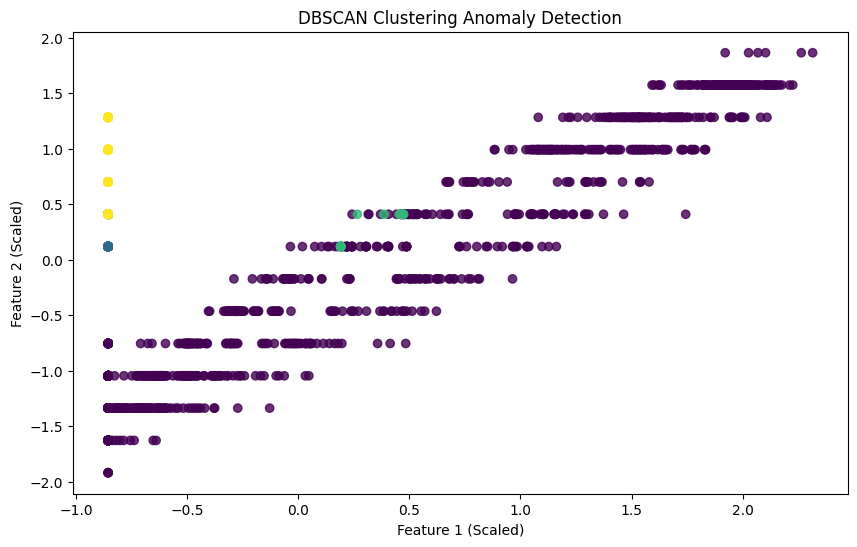

       Time  Temp  Setpt   Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  14:19:16  25.1   25.0  8.97   10.79    25.1    10.5    61.9    28.1   
1  14:19:17  25.1   25.0  9.29   10.77    25.1    10.5    61.9    28.1   
2  14:19:18  25.1   25.0  9.49   10.71    25.1    10.5    61.8    28.3   
3  14:19:19  25.1   25.0  9.52   10.67    25.1    10.5    61.8    28.3   
4  14:19:20  25.1   25.0  9.54   10.62    25.1    10.5    61.8    28.3   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -3.3  ...      3.77  37.76    3.93    9.29    0.91    25.0    12.0   
1      -3.3  ...      3.77  37.75    3.93    9.29    0.64    25.0    12.0   
2      -3.3  ...      3.78  37.72    3.93    9.49    0.00    25.0    12.0   
3      -3.1  ...      3.78  37.70    3.93    9.52    0.00    25.0    12.0   
4      -3.1  ...      3.79  37.68    3.93    9.55    0.00    25.0    12.0   

   DrvSet  CLevel  InwTmp  
0    25.0   13.28     0.0  
1    25.0   13.28     0.0  
2    25.

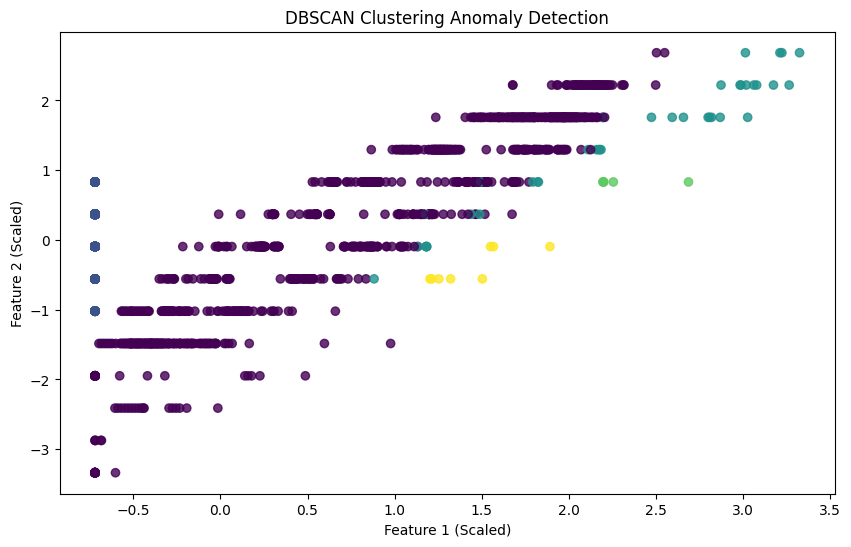

       Time  Temp  Setpt   Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  17:08:57  24.7   25.0  3.12    9.17    24.7   12.50    58.1    28.6   
1  17:08:57  24.7   25.0  3.21    9.18    24.7   12.50    58.1    28.6   
2  17:09:00  24.6   25.0  2.04    9.17    24.6   12.52    58.1    28.6   
3  17:09:01  24.6   25.0  1.00    9.15    24.6   12.57    58.1    28.6   
4  17:09:02  24.7   25.0  2.45    9.16    24.7   12.55    58.2    28.6   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -2.5  ...      3.77  37.47    4.55    3.20   12.43    25.0    12.0   
1      -2.5  ...      3.76  37.47    4.55    3.19   12.46    25.0    12.0   
2      -2.5  ...      3.77  37.47    4.61    1.07   12.51    25.0    12.0   
3      -2.5  ...      3.77  37.47    4.62    2.45   12.54    25.0    12.0   
4      -2.5  ...      3.78  37.47    4.59    2.71   12.55    25.0    12.0   

   DrvSet  CLevel  InwTmp  
0    25.0   14.63     0.0  
1    25.0   14.63     0.0  
2    25.

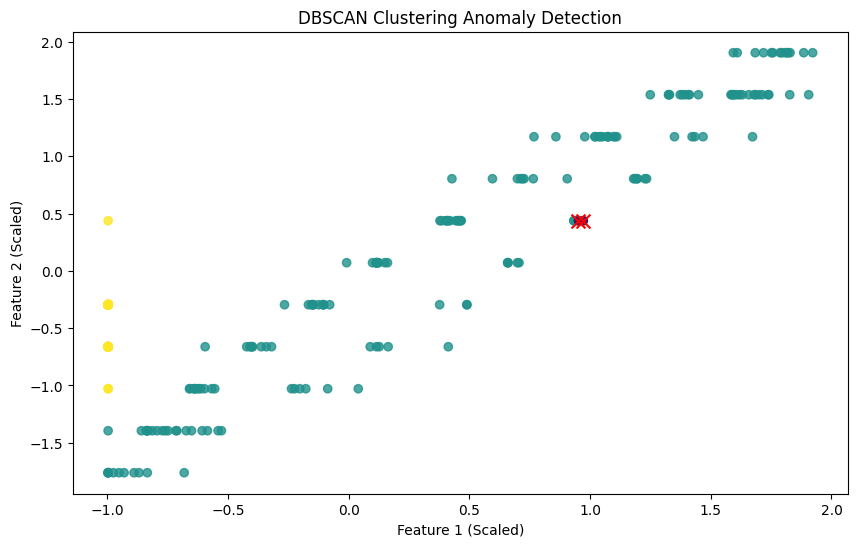

../HTOL-10
       Time  Temp  Setpt  Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  10:00:28  26.3   25.0  0.0   15.80    26.3   22.50    68.6    28.2   
1  10:00:29  26.3   25.0  0.0   15.78    26.3   22.50    68.6    28.2   
2  10:00:30  26.2   25.0  0.0   15.75    26.2   22.53    68.6    28.2   
3  10:00:31  26.2   25.0  0.0   15.72    26.2   22.56    68.6    28.2   
4  10:00:32  26.2   25.0  0.0   15.70    26.2   22.57    68.6    28.2   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -6.4  ...      3.58  29.06    2.84     0.0    0.00    25.0    20.0   
1      -6.4  ...      3.57  29.06    2.84     0.0    1.13    25.0    20.0   
2      -6.4  ...      3.55  29.06    2.86     0.0    0.98    25.0    20.0   
3      -6.5  ...      3.56  29.07    2.90     0.0    0.16    25.0    20.0   
4      -6.5  ...      3.56  29.07    2.92     0.0    0.00    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   14.49     0.0  
1    25.0   14.49     0.0  
2  

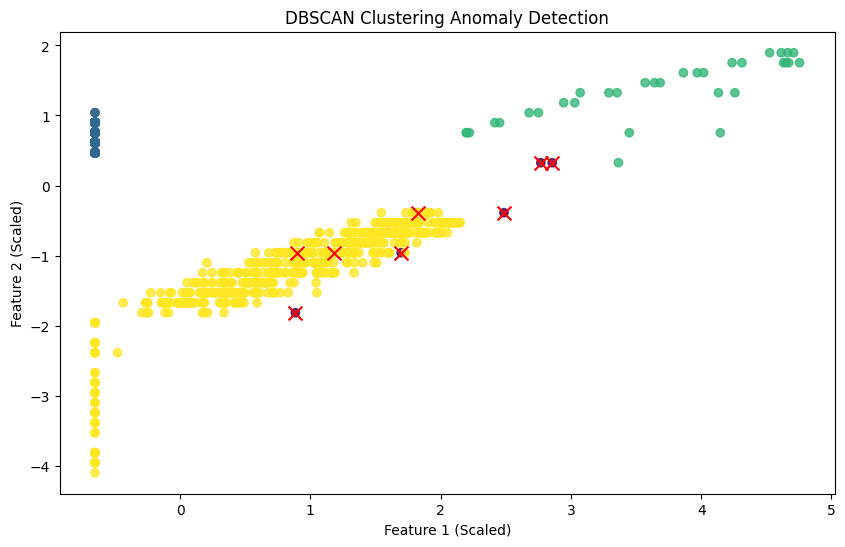

       Time  Temp  Setpt    Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  09:44:08  24.9   25.0  14.27   14.74    24.9   20.37    68.7    29.2   
1  09:44:08  24.9   25.0  14.26   14.73    24.9   20.35    68.7    29.2   
2  09:44:09  24.9   25.0  14.24   14.72    24.9   20.33    68.7    29.2   
3  09:44:10  25.0   25.0  15.55   14.70    25.0   20.32    68.7    29.1   
4  09:44:11  25.0   25.0  16.13   14.68    25.0   20.31    68.7    29.1   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -6.9  ...      3.55   35.8    3.90   14.27     0.0    25.0    20.0   
1      -6.9  ...      3.55   35.8    3.87   14.25     0.0    25.0    20.0   
2      -6.9  ...      3.55   35.8    3.85   14.38     0.0    25.0    20.0   
3      -6.9  ...      3.56   35.8    3.84   15.97     0.0    25.0    20.0   
4      -6.9  ...      3.56   35.8    3.83   16.13     0.0    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   14.19     0.0  
1    25.0   14.19     0.0  
2 

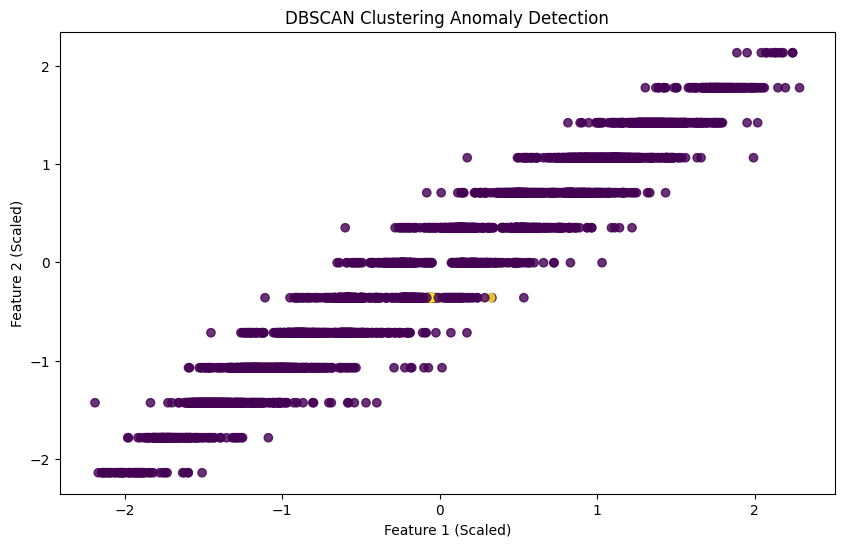

       Time  Temp  Setpt  Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  09:48:15  26.7   25.0  0.0   14.51    26.7   20.09    68.6    27.7   
1  09:48:15  26.7   25.0  0.0   14.50    26.7   20.09    68.6    27.7   
2  09:48:16  26.7   25.0  0.0   14.50    26.7   20.10    68.6    27.7   
3  09:48:17  26.7   25.0  0.0   14.50    26.7   20.10    68.6    27.7   
4  09:48:18  26.8   25.0  0.0   14.52    26.8   20.10    68.6    27.7   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -7.1  ...      3.57  23.87    3.13     0.0     0.0    25.0    20.0   
1      -7.1  ...      3.56  23.87    3.13     0.0     0.0    25.0    20.0   
2      -7.1  ...      3.58  23.87    3.14     0.0     0.0    25.0    20.0   
3      -7.0  ...      3.57  23.87    3.14     0.0     0.0    25.0    20.0   
4      -7.0  ...      3.57  23.87    3.14     0.0     0.0    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   14.05     0.0  
1    25.0   14.05     0.0  
2    25.0   14

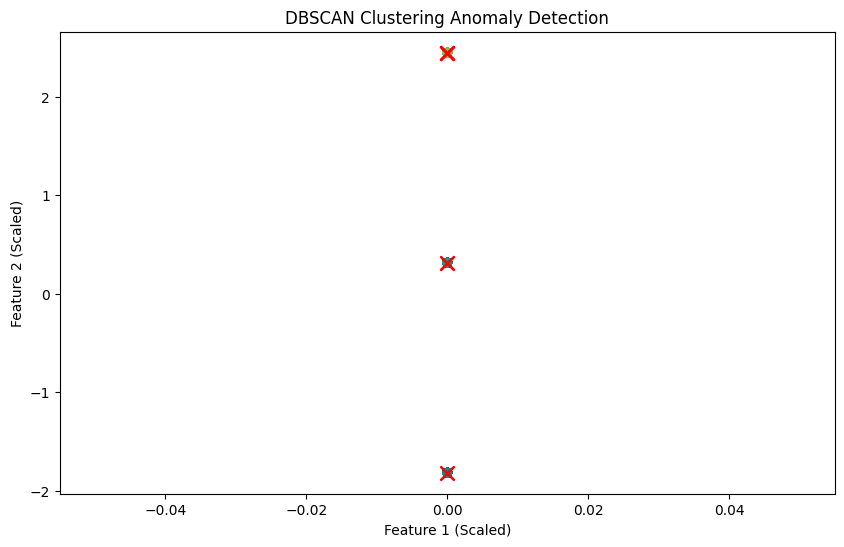

       Time  Temp  Setpt  Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  09:35:55  26.8   25.0  0.0   14.43    26.8    20.0    68.0    28.0   
1  09:35:55  26.8   25.0  0.0   14.43    26.8    20.0    68.0    28.0   
2  09:35:56  26.9   25.0  0.0   14.44    26.9    20.0    67.9    28.0   
3  09:35:57  26.9   25.0  0.0   14.45    26.9    20.0    67.9    28.0   
4  09:35:58  26.9   25.0  0.0   14.46    26.9    20.0    67.9    28.0   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -6.9  ...      3.53  23.86    3.04     0.0     0.0    25.0    20.0   
1      -7.0  ...      3.54  23.86    3.04     0.0     0.0    25.0    20.0   
2      -7.0  ...      3.55  23.86    3.04     0.0     0.0    25.0    20.0   
3      -7.0  ...      3.53  23.86    3.04     0.0     0.0    25.0    20.0   
4      -7.0  ...      3.55  23.86    3.04     0.0     0.0    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   13.76     0.0  
1    25.0   13.77     0.0  
2    25.0   13

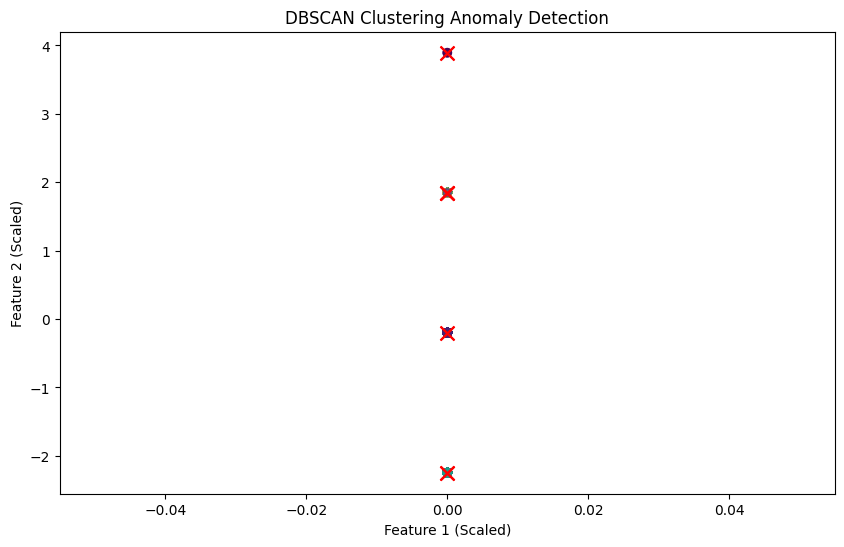

       Time  Temp  Setpt  Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  09:36:31  26.9   25.0  0.0   14.54    26.9   20.04    68.2    28.7   
1  09:36:32  26.9   25.0  0.0   14.55    26.9   20.02    68.3    28.7   
2  09:36:33  26.9   25.0  0.0   14.56    26.9   20.01    68.3    28.7   
3  09:36:34  26.8   25.0  0.0   14.56    26.8   20.02    68.3    28.7   
4  09:36:35  26.8   25.0  0.0   14.57    26.8   20.05    68.2    28.7   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -7.0  ...      3.54  23.82    3.08     0.0    0.00    25.0    20.0   
1      -7.0  ...      3.56  23.82    3.06     0.0    0.00    25.0    20.0   
2      -7.0  ...      3.54  23.82    3.05     0.0    1.16    25.0    20.0   
3      -7.0  ...      3.54  23.82    3.05     0.0    1.51    25.0    20.0   
4      -7.0  ...      3.55  23.82    3.10     0.0    1.46    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   13.70     0.0  
1    25.0   13.70     0.0  
2    25.0   13

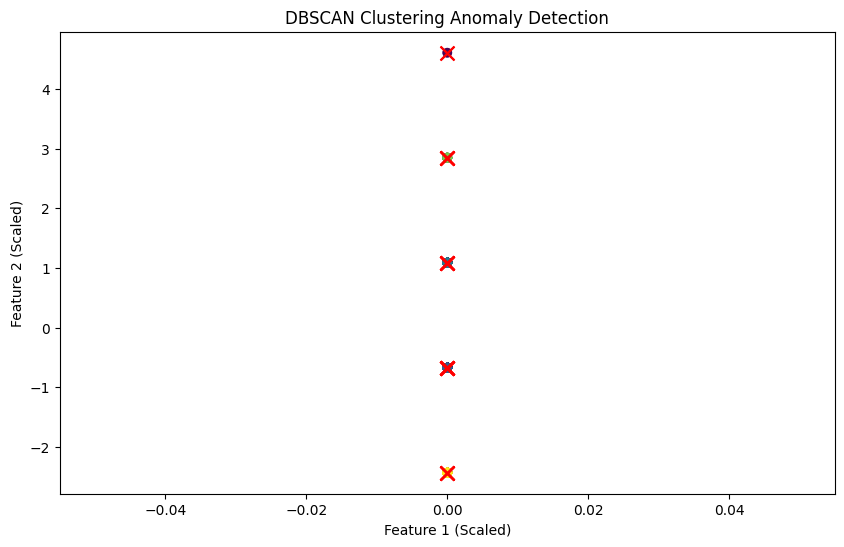

       Time  Temp  Setpt  Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  14:41:22  26.7   25.0  0.0   14.40    26.7   19.67    67.8    27.4   
1  14:41:23  26.7   25.0  0.0   14.40    26.7   19.65    67.9    27.4   
2  14:41:24  26.7   25.0  0.0   14.41    26.7   19.63    67.9    27.4   
3  14:41:25  26.7   25.0  0.0   14.42    26.7   19.62    67.9    27.4   
4  14:41:26  26.7   25.0  0.0   14.44    26.7   19.61    67.9    27.4   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -6.9  ...      3.55  23.82    3.18     0.0     0.0    25.0    20.0   
1      -6.9  ...      3.57  23.82    3.14     0.0     0.0    25.0    20.0   
2      -6.9  ...      3.55  23.82    3.12     0.0     0.0    25.0    20.0   
3      -6.9  ...      3.57  23.82    3.11     0.0     0.0    25.0    20.0   
4      -6.9  ...      3.56  23.82    3.10     0.0     0.0    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   14.02     0.0  
1    25.0   14.03     0.0  
2    25.0   14

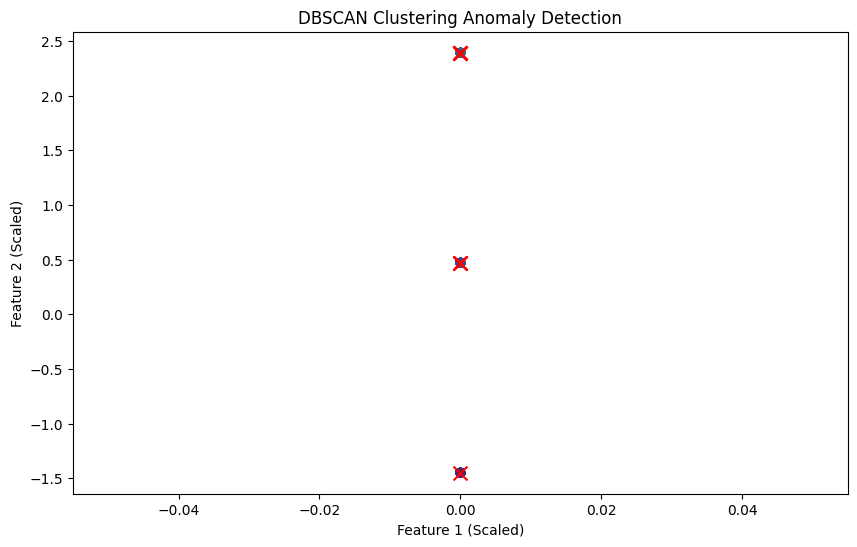

       Time  Temp  Setpt  Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  10:10:36  26.9   25.0  0.0   14.72    26.9    20.0    68.2    29.1   
1  10:10:37  26.9   25.0  0.0   14.71    26.9    20.0    68.2    29.1   
2  10:10:38  26.9   25.0  0.0   14.71    26.9    20.0    68.3    29.1   
3  10:10:39  26.9   25.0  0.0   14.71    26.9    20.0    68.3    29.1   
4  10:10:40  26.9   25.0  0.0   14.71    26.9    20.0    68.3    29.1   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -6.8  ...      3.56  23.93    3.54     0.0   100.0    25.0    20.0   
1      -6.8  ...      3.56  23.93    3.54     0.0   100.0    25.0    20.0   
2      -6.8  ...      3.54  23.94    3.54     0.0   100.0    25.0    20.0   
3      -6.8  ...      3.55  23.93    3.54     0.0   100.0    25.0    20.0   
4      -6.8  ...      3.56  23.93    3.54     0.0   100.0    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   14.48     0.0  
1    25.0   14.47     0.0  
2    25.0   14

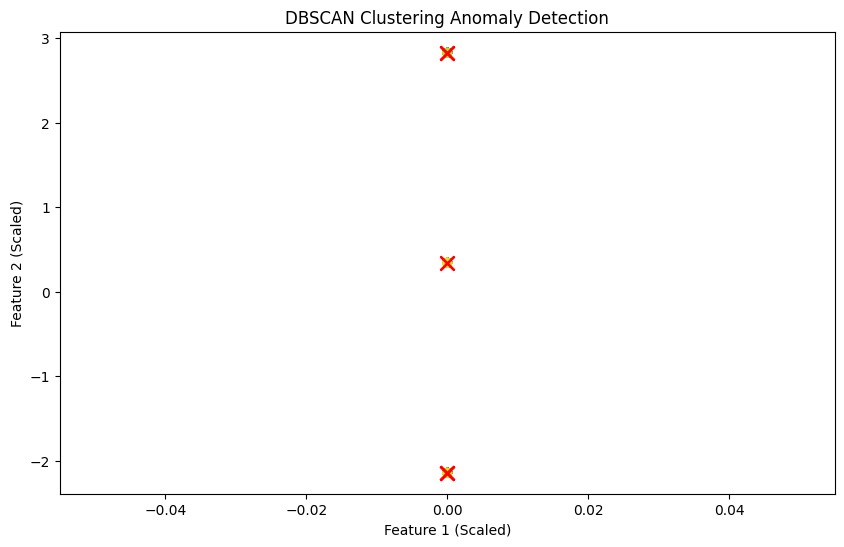

       Time  Temp  Setpt  Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  10:00:25  26.9   25.0  0.0   14.63    26.9   20.00    68.3    28.1   
1  10:00:26  26.9   25.0  0.0   14.62    26.9   20.00    68.3    28.1   
2  10:00:27  26.9   25.0  0.0   14.62    26.9   19.97    68.3    28.1   
3  10:00:28  26.9   25.0  0.0   14.61    26.9   19.94    68.3    28.1   
4  10:00:29  26.9   25.0  0.0   14.63    26.9   19.95    68.3    28.0   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -6.9  ...      3.57  23.90    3.51     0.0     0.0    25.0    20.0   
1      -6.9  ...      3.57  23.90    3.51     0.0     0.0    25.0    20.0   
2      -6.9  ...      3.55  23.90    3.49     0.0     0.0    25.0    20.0   
3      -6.9  ...      3.57  23.90    3.46     0.0     0.0    25.0    20.0   
4      -6.9  ...      3.55  23.91    3.45     0.0     0.0    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   14.42     0.0  
1    25.0   14.44     0.0  
2    25.0   14

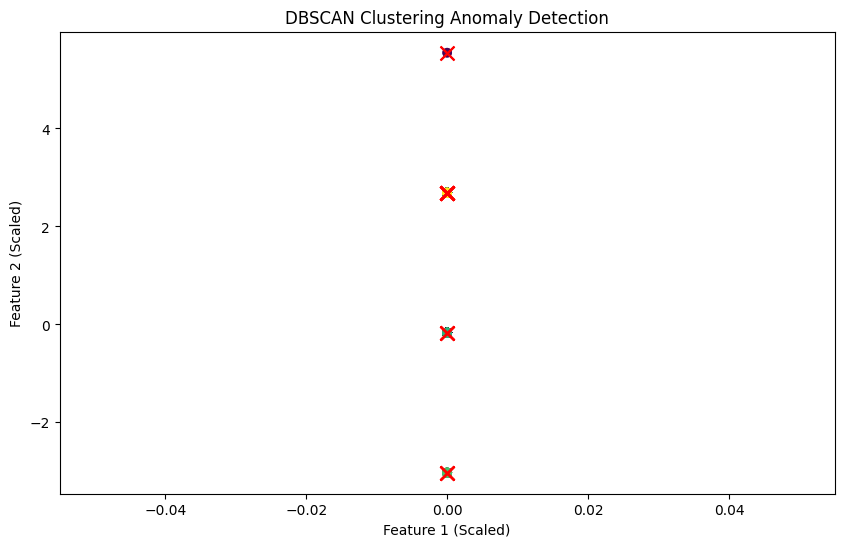

       Time  Temp  Setpt   Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  10:07:12  24.6   25.0  4.31   14.70    24.6    20.3    68.2    27.8   
1  10:07:13  24.6   25.0  4.04   14.70    24.6    20.3    68.2    27.8   
2  10:07:14  24.6   25.0  3.93   14.70    24.6    20.3    68.2    27.8   
3  10:07:15  24.6   25.0  3.85   14.71    24.6    20.3    68.2    27.8   
4  10:07:16  24.6   25.0  3.77   14.72    24.6    20.3    68.1    27.8   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -6.9  ...      3.56  36.08    3.77    4.31     0.0    25.0    20.0   
1      -6.9  ...      3.56  36.09    3.77    4.04     0.0    25.0    20.0   
2      -6.9  ...      3.55  36.09    3.77    3.93     0.0    25.0    20.0   
3      -6.9  ...      3.58  36.09    3.77    3.85     0.0    25.0    20.0   
4      -6.9  ...      3.57  36.09    3.77    3.77     0.0    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   14.68     0.0  
1    25.0   14.66     0.0  
2    25.

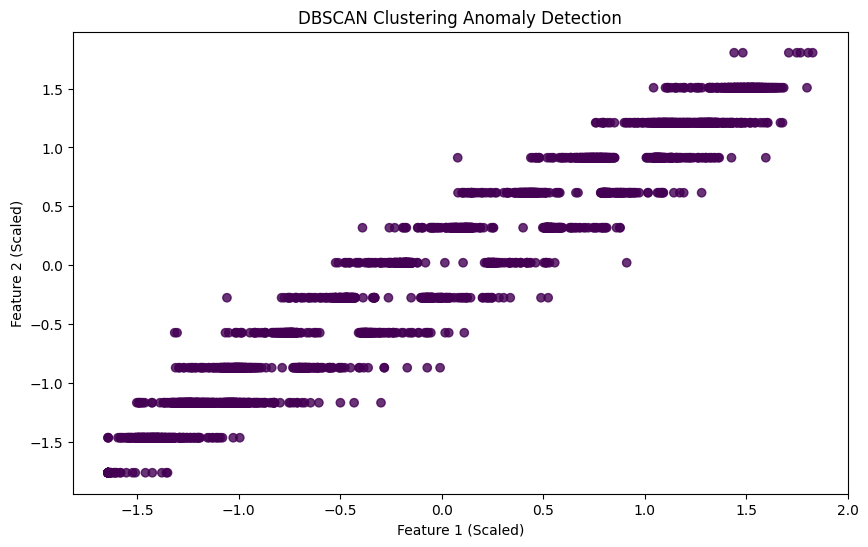

       Time  Temp  Setpt  Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  10:12:15  26.8   25.0  0.0   14.82    26.8    20.5    68.6    29.3   
1  10:12:16  26.8   25.0  0.0   14.82    26.8    20.5    68.6    29.1   
2  10:12:17  26.8   25.0  0.0   14.81    26.8    20.5    68.6    29.1   
3  10:12:18  26.8   25.0  0.0   14.81    26.8    20.5    68.6    29.2   
4  10:12:19  26.8   25.0  0.0   14.81    26.8    20.5    68.6    29.2   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -6.8  ...      3.54  23.86    4.09     0.0   100.0    25.0    20.0   
1      -6.8  ...      3.54  23.86    4.09     0.0   100.0    25.0    20.0   
2      -6.8  ...      3.54  23.86    4.09     0.0   100.0    25.0    20.0   
3      -6.8  ...      3.57  23.86    4.09     0.0   100.0    25.0    20.0   
4      -6.8  ...      3.54  23.86    4.10     0.0   100.0    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   14.51     0.0  
1    25.0   14.51     0.0  
2    25.0   14

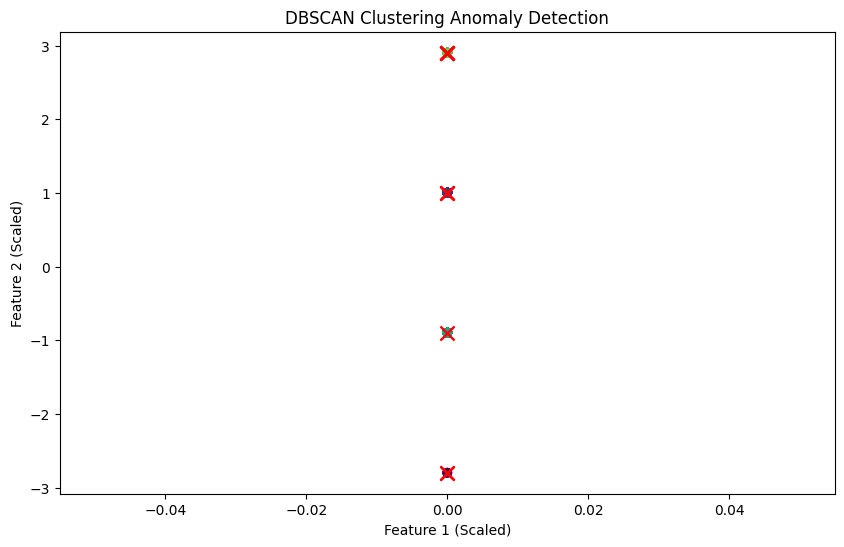

       Time  Temp  Setpt  Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  15:02:51  26.9   25.0  0.0   14.60    26.9   19.93    68.5    28.9   
1  15:02:52  26.9   25.0  0.0   14.61    26.9   19.92    68.5    28.9   
2  15:02:53  26.9   25.0  0.0   14.63    26.9   19.91    68.5    28.9   
3  15:02:54  26.9   25.0  0.0   14.63    26.9   19.91    68.5    28.9   
4  15:02:55  26.8   25.0  0.0   14.62    26.8   19.93    68.6    28.9   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -6.9  ...      3.55  23.92    3.37     0.0    4.73    25.0    20.0   
1      -6.9  ...      3.55  23.92    3.36     0.0    4.66    25.0    20.0   
2      -6.9  ...      3.54  23.92    3.35     0.0    4.58    25.0    20.0   
3      -6.9  ...      3.54  23.92    3.34     0.0    4.50    25.0    20.0   
4      -6.9  ...      3.55  23.92    3.37     0.0    4.42    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   14.46     0.0  
1    25.0   14.48     0.0  
2    25.0   14

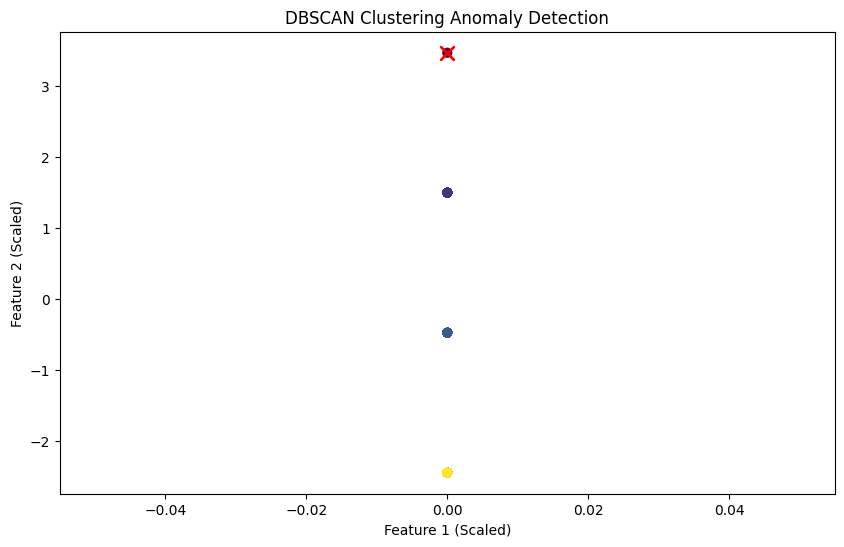

       Time  Temp  Setpt  Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  09:57:06  26.9   25.0  0.0   14.53    26.9   20.15    68.6    28.4   
1  09:57:07  26.9   25.0  0.0   14.52    26.9   20.13    68.6    28.4   
2  09:57:08  26.9   25.0  0.0   14.52    26.9   20.14    68.6    28.4   
3  09:57:09  26.9   25.0  0.0   14.52    26.9   20.16    68.6    28.3   
4  09:57:10  26.9   25.0  0.0   14.51    26.9   20.18    68.6    28.3   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -6.9  ...      3.59  23.89    3.67     0.0     0.0    25.0    20.0   
1      -6.9  ...      3.58  23.89    3.64     0.0     0.0    25.0    20.0   
2      -6.9  ...      3.57  23.89    3.65     0.0     0.0    25.0    20.0   
3      -6.9  ...      3.58  23.89    3.66     0.0     0.0    25.0    20.0   
4      -6.9  ...      3.58  23.89    3.69     0.0     0.0    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   14.45     0.0  
1    25.0   14.44     0.0  
2    25.0   14

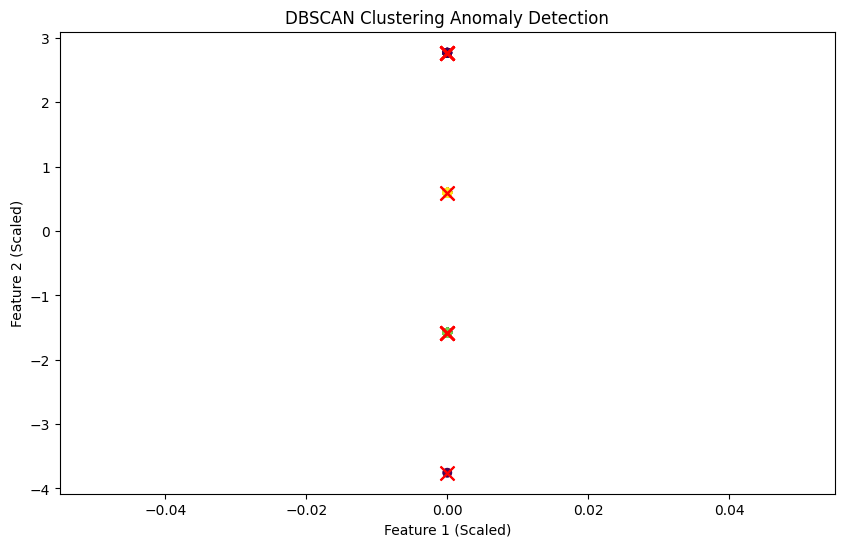

       Time  Temp  Setpt  Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  10:25:57  26.9   25.0  0.0   14.69    26.9   20.12    68.6    28.7   
1  10:25:58  26.9   25.0  0.0   14.70    26.9   20.11    68.6    28.7   
2  10:25:59  27.1   25.0  0.0   14.70    27.1   20.11    68.6    28.7   
3  10:26:00  27.1   25.0  0.0   14.70    27.1   20.10    68.6    28.7   
4  10:26:01  27.1   25.0  0.0   14.70    26.9   20.10    68.6    28.7   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -6.9  ...      3.56  23.83    3.62     0.0     0.0    25.0    20.0   
1      -6.8  ...      3.57  23.83    3.61     0.0     0.0    25.0    20.0   
2      -6.8  ...      3.55  23.83    3.60     0.0     0.0    25.0    20.0   
3      -6.9  ...      3.57  23.83    3.60     0.0     0.0    25.0    20.0   
4      -6.9  ...      3.56  23.83    3.60     0.0     0.0    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   14.52     0.0  
1    25.0   14.53     0.0  
2    25.0   14

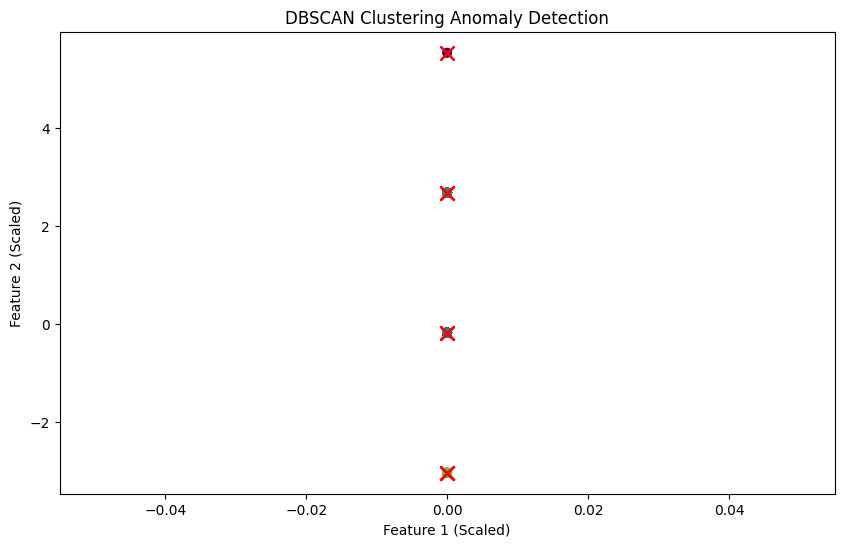

       Time  Temp  Setpt  Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  13:29:55  26.9   25.0  0.0   14.31    26.9    19.8    68.4    28.1   
1  13:29:56  26.9   25.0  0.0   14.31    26.9    19.8    68.4    28.1   
2  13:29:57  26.9   25.0  0.0   14.33    26.9    19.8    68.3    28.1   
3  13:29:58  26.9   25.0  0.0   14.34    26.9    19.8    68.3    28.1   
4  13:29:59  26.9   25.0  0.0   14.35    26.9    19.8    68.3    28.1   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -6.8  ...      3.57  23.87    3.09     0.0     0.0    25.0    20.0   
1      -6.9  ...      3.58  23.87    3.09     0.0     0.0    25.0    20.0   
2      -6.9  ...      3.58  23.87    3.09     0.0     0.0    25.0    20.0   
3      -7.0  ...      3.57  23.87    3.09     0.0     0.0    25.0    20.0   
4      -7.0  ...      3.59  23.87    3.09     0.0     0.0    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   14.26     0.0  
1    25.0   14.26     0.0  
2    25.0   14

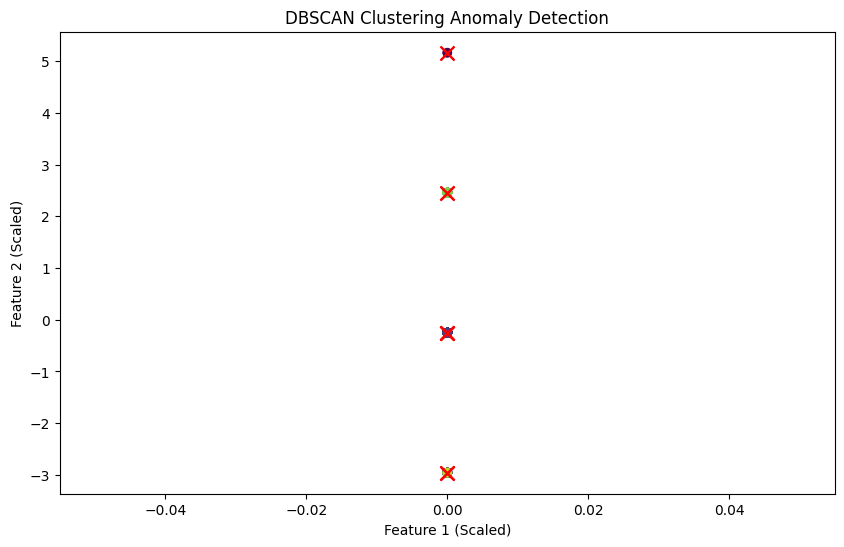

       Time  Temp  Setpt   Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  13:45:30  24.6   25.0  2.37   14.72    24.6   20.43    68.9    28.7   
1  13:45:30  24.6   25.0  2.32   14.72    24.6   20.42    68.9    28.7   
2  13:45:31  24.6   25.0  2.24   14.72    24.6   20.41    68.8    28.7   
3  13:45:33  24.6   25.0  2.16   14.71    24.6   20.41    68.8    28.7   
4  13:45:33  24.6   25.0  2.08   14.69    24.6   20.41    68.8    28.7   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -6.9  ...      3.56  37.48    4.08    2.35     0.0    25.0    20.0   
1      -6.9  ...      3.57  37.48    4.06    2.32     0.0    25.0    20.0   
2      -6.9  ...      3.56  37.48    4.05    2.24     0.0    25.0    20.0   
3      -6.9  ...      3.59  37.48    4.05    2.16     0.0    25.0    20.0   
4      -6.9  ...      3.58  37.49    4.04    2.08     0.0    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   14.19     0.0  
1    25.0   14.19     0.0  
2    25.

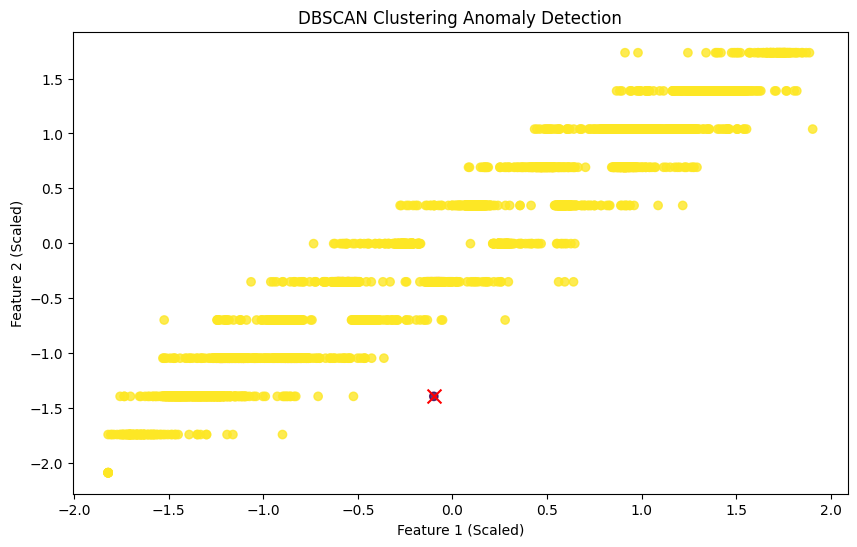

       Time  Temp  Setpt  Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  10:11:39  26.8   25.0  0.0   14.55    26.8    20.2    68.4    28.2   
1  10:11:40  26.8   25.0  0.0   14.56    26.8    20.2    68.4    28.2   
2  10:11:41  26.8   25.0  0.0   14.57    26.8    20.2    68.3    28.3   
3  10:11:42  26.7   25.0  0.0   14.57    26.7    20.2    68.3    28.3   
4  10:11:43  26.7   25.0  0.0   14.58    26.7    20.2    68.3    28.3   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -6.9  ...      3.58   23.9    3.42     0.0     0.0    25.0    20.0   
1      -6.9  ...      3.57   23.9    3.43     0.0     0.0    25.0    20.0   
2      -6.9  ...      3.58   23.9    3.43     0.0     0.0    25.0    20.0   
3      -6.9  ...      3.57   23.9    3.43     0.0     0.0    25.0    20.0   
4      -6.9  ...      3.59   23.9    3.43     0.0     0.0    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   14.97     0.0  
1    25.0   14.98     0.0  
2    25.0   14

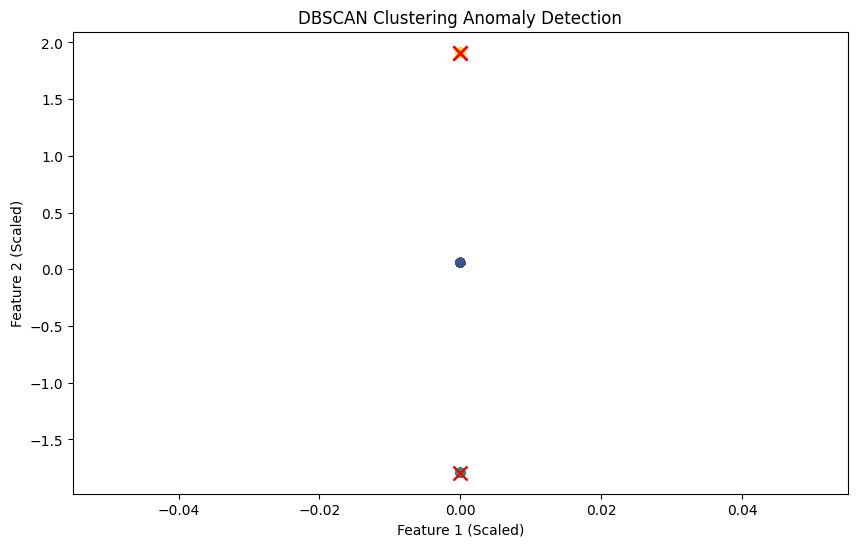

       Time  Temp  Setpt    Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  10:04:37  25.2   25.0  13.21   14.54    25.2    20.0    68.2    28.1   
1  10:04:38  25.2   25.0  13.29   14.54    25.2    20.0    68.2    28.1   
2  10:04:39  25.2   25.0  13.34   14.53    25.2    20.0    68.2    28.1   
3  10:04:40  25.2   25.0  13.38   14.52    25.2    20.0    68.2    28.1   
4  10:04:42  25.3   25.0  14.59   14.52    25.3    20.0    68.1    28.1   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -6.6  ...      3.57  37.38    3.01   13.21     0.0    25.0    20.0   
1      -6.8  ...      3.59  37.38    3.01   13.29     0.0    25.0    20.0   
2      -6.8  ...      3.57  37.38    3.01   13.34     0.0    25.0    20.0   
3      -6.7  ...      3.57  37.38    3.01   13.38     0.0    25.0    20.0   
4      -6.7  ...      3.57  37.39    3.01   14.59     0.0    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   14.97     0.0  
1    25.0   14.96     0.0  
2 

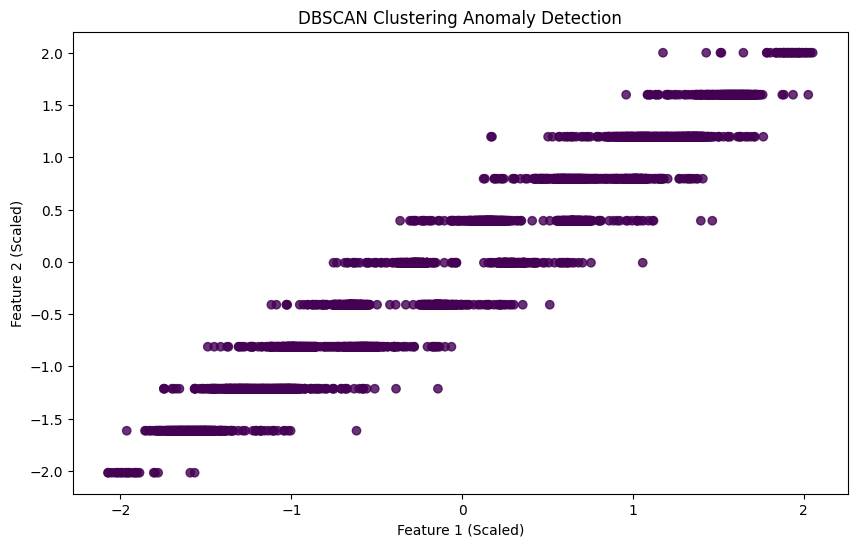

       Time  Temp  Setpt    Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  09:48:36  25.0   25.0  10.51    14.6    25.0   20.10    68.2    27.6   
1  09:48:37  25.1   25.0  10.51    14.6    25.1   20.10    68.2    27.6   
2  09:48:38  25.1   25.0  12.21    14.6    25.1   20.10    68.2    27.6   
3  09:48:39  25.1   25.0  12.51    14.6    25.1   20.10    68.2    27.6   
4  09:48:40  25.1   25.0  12.56    14.6    25.1   20.07    68.2    27.6   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -6.8  ...      3.57  35.43    3.14   10.51     0.0    25.0    20.0   
1      -6.8  ...      3.57  35.43    3.14   10.51     0.0    25.0    20.0   
2      -6.6  ...      3.59  35.43    3.14   12.21     0.0    25.0    20.0   
3      -6.6  ...      3.57  35.43    3.14   12.51     0.0    25.0    20.0   
4      -6.6  ...      3.59  35.43    3.12   12.56     0.0    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   14.94     0.0  
1    25.0   14.94     0.0  
2 

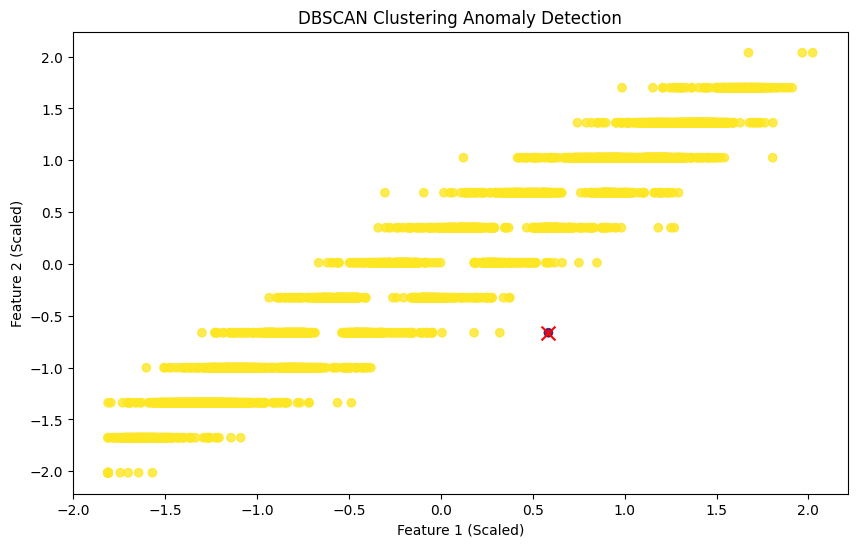

       Time  Temp  Setpt  Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  10:39:06  26.1   25.0  0.0   14.68    26.1   20.07    67.8    28.8   
1  10:39:07  26.1   25.0  0.0   14.68    26.1   20.05    67.8    28.8   
2  10:39:08  26.1   25.0  0.0   14.67    26.1   20.03    67.8    28.8   
3  10:39:09  26.1   25.0  0.0   14.66    26.1   20.02    67.8    28.8   
4  10:39:10  26.1   25.0  0.0   14.65    26.1   20.01    67.8    28.8   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -6.9  ...      3.56  26.84    3.28     0.0    6.30    25.0    20.0   
1      -6.6  ...      3.55  26.84    3.26     0.0    6.29    25.0    20.0   
2      -6.6  ...      3.57  26.84    3.23     0.0    6.24    25.0    20.0   
3      -6.6  ...      3.55  26.84    3.22     0.0    6.15    25.0    20.0   
4      -6.6  ...      3.57  26.84    3.21     0.0    6.09    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   14.88     0.0  
1    25.0   14.88     0.0  
2    25.0   14

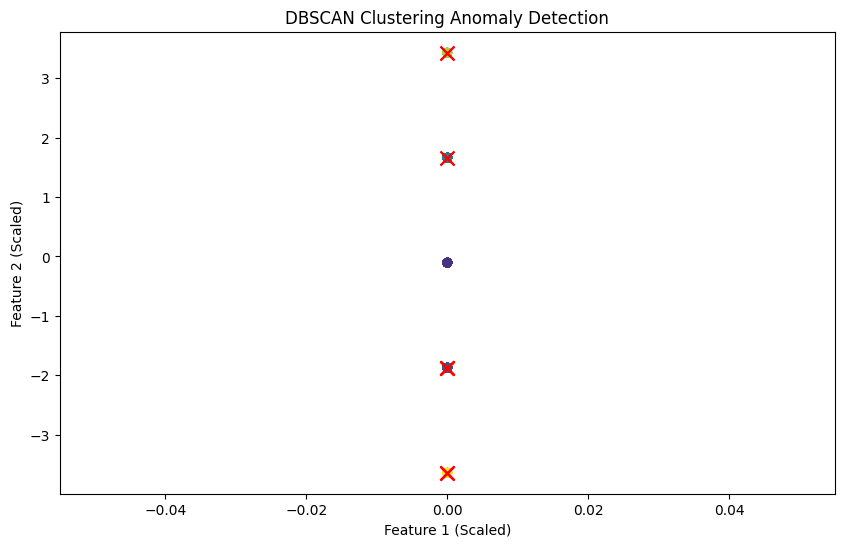

       Time  Temp  Setpt    Pwr  SucTmp  ChmTmp  ChlTmp  DisTmp  DrvTmp  \
0  15:19:19  25.3   25.0  15.40   14.63    25.3    20.0    67.7    28.4   
1  15:19:20  25.3   25.0  15.78   14.62    25.3    20.0    67.7    28.4   
2  15:19:21  25.2   25.0  15.01   14.62    25.2    20.0    67.7    28.4   
3  15:19:22  25.2   25.0  14.22   14.62    25.2    20.0    67.7    28.4   
4  15:19:23  25.3   25.0  14.87   14.63    25.3    20.0    67.7    28.4   

   DeSupTmp  ...  PumpAmps  Humid  ChlPwr  ChmPwr  DrvPwr  ChmSet  ChlSet  \
0      -6.7  ...      3.56  36.93    3.53   15.40     0.0    25.0    20.0   
1      -6.7  ...      3.56  36.93    3.53   15.94     0.0    25.0    20.0   
2      -6.7  ...      3.56  36.93    3.53   14.42     0.0    25.0    20.0   
3      -6.7  ...      3.54  36.93    3.53   14.16     0.0    25.0    20.0   
4      -6.7  ...      3.56  36.93    3.53   15.70     0.0    25.0    20.0   

   DrvSet  CLevel  InwTmp  
0    25.0   14.63     0.0  
1    25.0   14.64     0.0  
2 

In [54]:
data_directory = "../"

for directory in os.listdir(data_directory):
    if directory.startswith("HTOL-"):
        machine_folder_path = os.path.join(data_directory, directory)
        print(machine_folder_path)
        for file_name in os.listdir(machine_folder_path):
            file_path = os.path.join(machine_folder_path, file_name)
            df = pd.read_csv(file_path, skiprows=3)
            print(df.head())
            # anomaly_detection_PCA(df)
            anomaly_detection_CLUSTERING(df)
